<a href="https://colab.research.google.com/github/BobSheehan23/Bob-Sheehan-CMT-CFA/blob/main/Macro_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Top line links**
* The stock market is not the economy
  * https://fredblog.stlouisfed.org/2019/08/the-stock-market-is-not-the-economy/
  * 4 Key Indicators That Move The Markets
https://www.investopedia.com/articles/fundamental-analysis/10/indicators-that-move-the-market.asp
  * 10 Most popular economics charts on FRED
https://www.businessinsider.com/10-most-popular-economics-charts-on-fred-2013-9?r=US&IR=T

**FRED Database in Quandl**
* https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data/documentation
* FUll description of metrics: https://docs.google.com/document/d/1Cf4C3Xz4_yitlzPaLEknHoDlw7KMXey4c49kZ7ucQEE/edit#

# 0. Prep

In [ ]:
!pip install quandl

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0255a423f148c2c41613de8a2096d40d3bffb98cb128539cf153c53da33f7a3d
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import quandl
import pandas_datareader as pdr

import pandas as pd
import yfinance as yf
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2021; month= 10; day=7
Period for indexes: 1951-10-07 to 2021-10-07 


# 01. Indexes

In [ ]:
# Other indexes: https://stooq.com/t/

# DJI= DOW JONES INDU
dji_index = pdr.get_data_stooq('^DJI',start,end)
# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)

In [ ]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = spx_index.Close/spx_index.Close.shift(-1)
spx_index['spx_qoq'] = spx_index.Close/spx_index.Close.shift(-63)
spx_index['spx_yoy'] = spx_index.Close/spx_index.Close.shift(-252)

dji_index['dji_dod'] = dji_index.Close/dji_index.Close.shift(-1)
dji_index['dji_qoq'] = dji_index.Close/dji_index.Close.shift(-63)
dji_index['dji_yoy'] = dji_index.Close/dji_index.Close.shift(-252)

In [ ]:
spx_index.head()

Open     High      Low  ...   spx_dod   spx_qoq   spx_yoy
Date                                   ...                              
2021-10-06  4319.57  4365.57  4290.49  ...  1.004103  1.009889  1.298309
2021-10-05  4309.87  4369.23  4309.87  ...  1.010524  0.997152  1.274917
2021-10-04  4348.84  4355.51  4278.94  ...  0.987014  0.990082  1.284317
2021-10-01  4317.16  4375.19  4288.52  ...  1.011491  1.001080  1.288760
2021-09-30  4370.67  4382.55  4306.24  ...  0.988090  0.997130  1.280862

[5 rows x 8 columns]

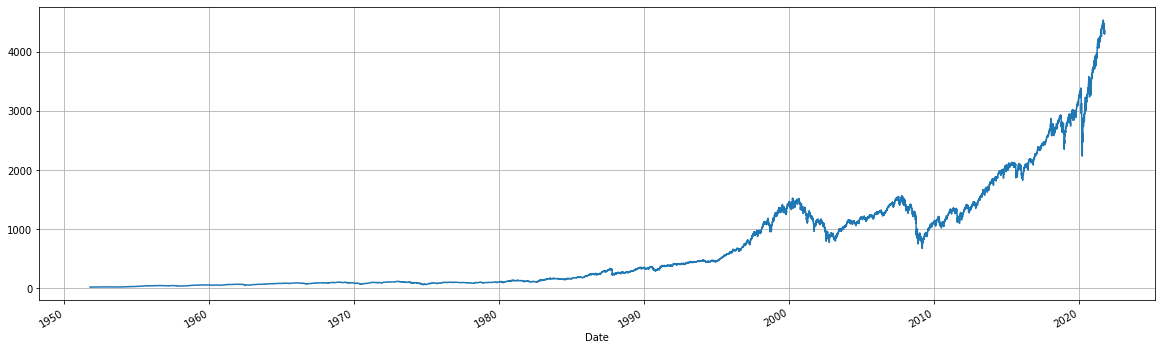

In [ ]:
spx_index.Close.plot.line(figsize=(20,6), grid = True)

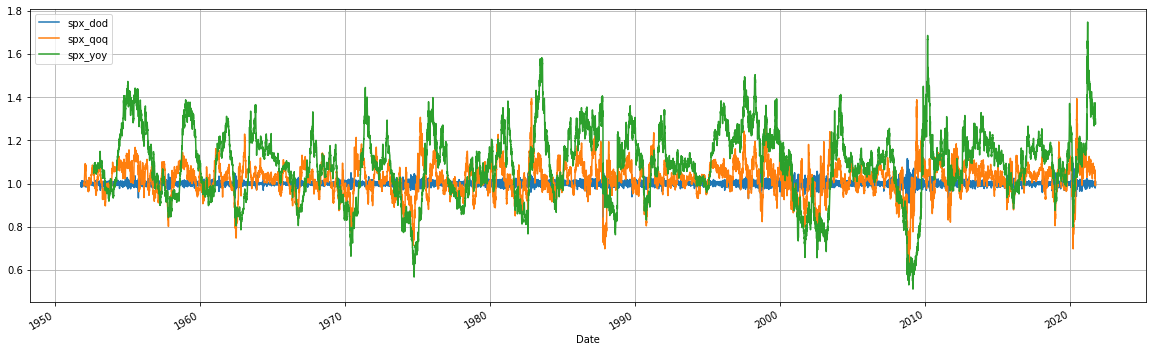

In [ ]:
'SNP 500 Index growth: daily, quarterly, yearly'
spx_index[['spx_dod','spx_qoq','spx_yoy']].plot.line(figsize=(20,6), grid = True)

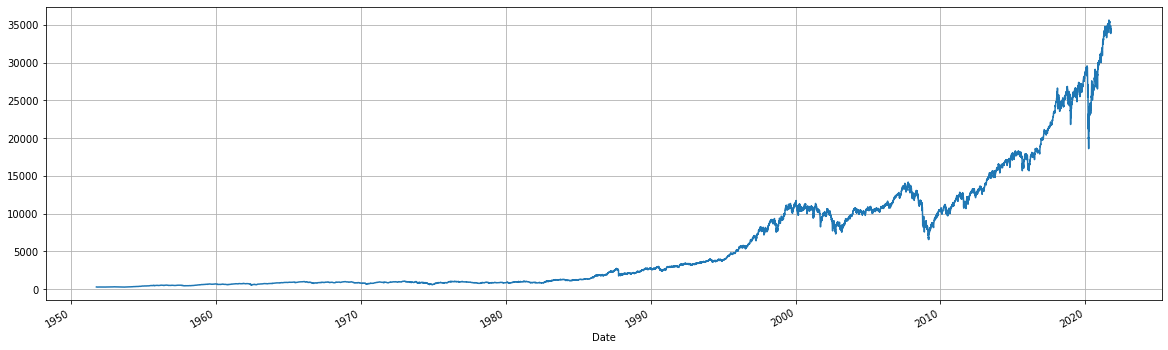

In [ ]:
dji_index.Close.plot.line(figsize=(20,6), grid = True)

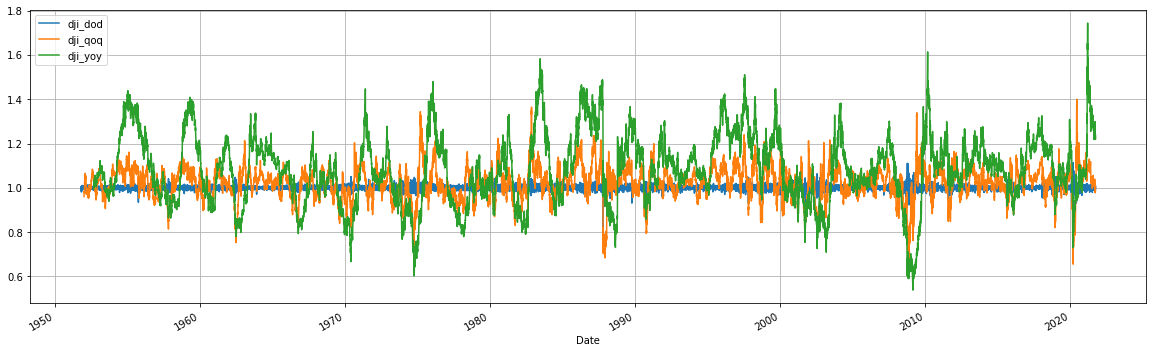

In [ ]:
# Dow Jones Index growth: daily, quarterly, yearly
dji_index[['dji_dod','dji_qoq','dji_yoy']].plot.line(figsize=(20,6), grid = True)

# 1. FRED Metrics

## 1.1 GROWTH
*GDP, GDPC1, GDPPOT, gpd_world (NYGDPMKTPCDWLD)*

In [ ]:
# GDP US, $b: https://fred.stlouisfed.org/series/GDP ==> QUARTERLY GDP US
gdp = pdr.DataReader("GDP", "fred", start=start)

In [ ]:
gdp['gdp_us_yoy'] = gdp.GDP/gdp.GDP.shift(4)-1
gdp['gdp_us_qoq'] = gdp.GDP/gdp.GDP.shift(1)-1
gdp.tail(10)

GDP  gdp_us_yoy  gdp_us_qoq
DATE                                         
2019-01-01  21001.591    0.042588    0.009045
2019-04-01  21289.268    0.038881    0.013698
2019-07-01  21505.012    0.040946    0.010134
2019-10-01  21694.458    0.042335    0.008809
2020-01-01  21481.367    0.022845   -0.009822
2020-04-01  19477.444   -0.085105   -0.093287
2020-07-01  21138.574   -0.017040    0.085285
2020-10-01  21477.597   -0.009996    0.016038
2021-01-01  22038.226    0.025923    0.026103
2021-04-01  22740.959    0.167554    0.031887

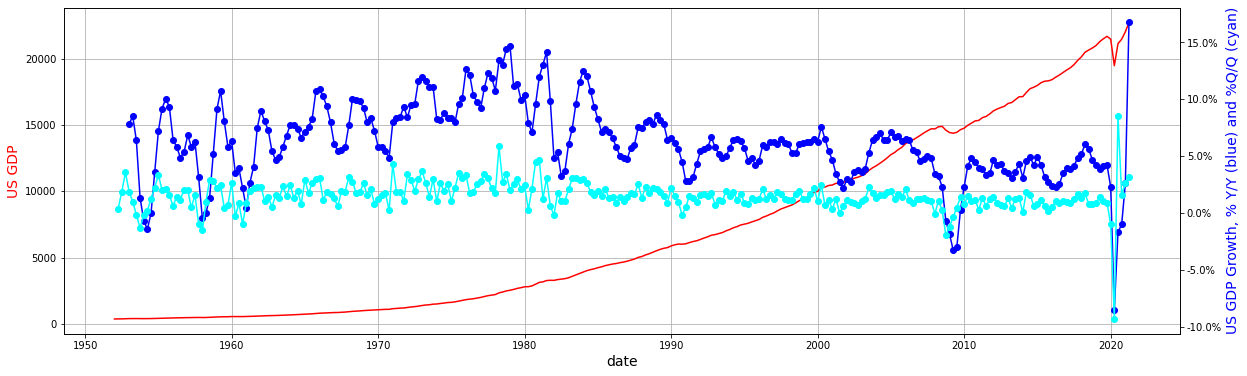

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdp.GDP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US GDP",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdp.gdp_us_yoy, color="blue",marker="o")
ax2.plot(gdp.gdp_us_qoq, color="cyan",marker="o")
ax2.set_ylabel("US GDP Growth, % Y/Y (blue) and %Q/Q (cyan)",color="blue",fontsize=14)
plt.show()

# OLD: gdp.GDP.plot.line(figsize=(20,6), grid = True)

In [ ]:
# Real Gross Domestic Product, $b chained 2012 USD, CHAINED ==> QUARTERLY
# GDPC1, $b: https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

GDPC1  gdpc1_us_yoy  gdpc1_us_qoq
DATE                                             
2020-04-01  17258.205     -0.090837     -0.089373
2020-07-01  18560.774     -0.028875      0.075475
2020-10-01  18767.778     -0.022629      0.011153
2021-01-01  19055.655      0.005470      0.015339
2021-04-01  19368.310      0.122267      0.016407

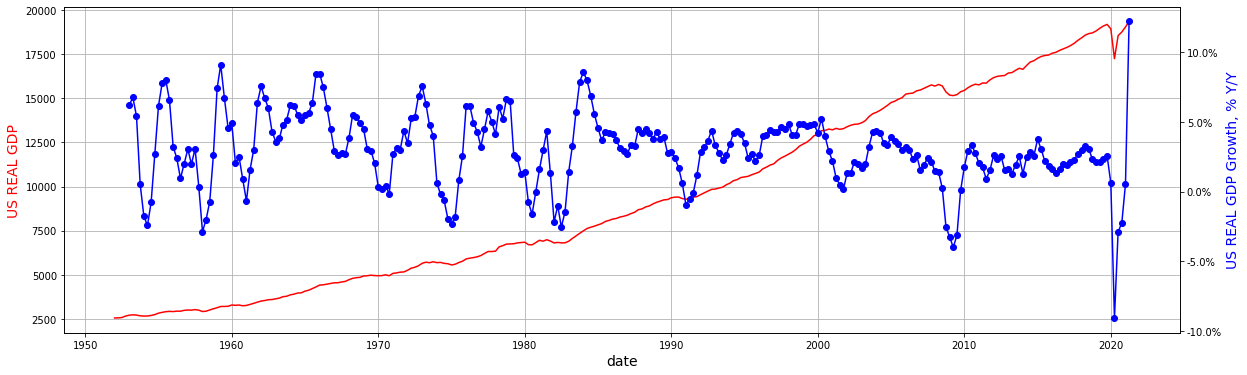

In [ ]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdpc1.GDPC1, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US REAL GDP",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1['gdpc1_us_yoy'], color="blue",marker="o")
ax2.set_ylabel("US REAL GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdpc1.GDPC1.plot.line(figsize=(20,6), grid = True)

In [ ]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [ ]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                              
2020-10-01  19512.02       0.018525       0.018525
2021-01-01  19602.54       0.018302       0.018302
2021-04-01  19697.36       0.018468       0.018468
2021-07-01  19795.82       0.019132       0.019132
2021-10-01  19898.25       0.019794       0.019794

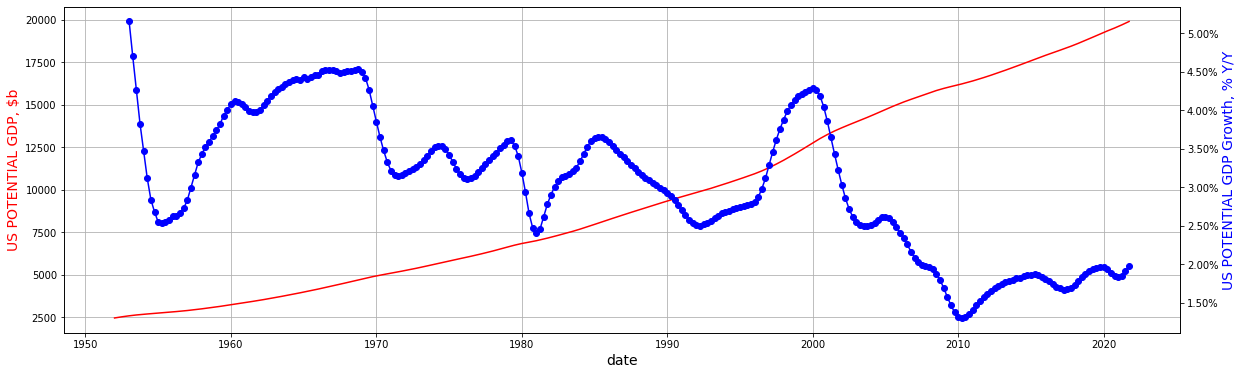

In [ ]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdppot.GDPPOT, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US POTENTIAL GDP, $b",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue",marker="o")
ax2.set_ylabel("US POTENTIAL GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdpc1.GDPC1.plot.line(figsize=(20,6), grid = True)

In [ ]:
# https://fred.stlouisfed.org/series/NYGDPMKTPCDWLD
# GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product
# taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions
# for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S.
# dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates.
# For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign
# exchange transactions, an alternative conversion factor is used.

gdp_world = pdr.DataReader("NYGDPMKTPCDWLD", "fred", start=start)

In [ ]:
gdp_world['gdp_world_yoy'] = gdp_world.NYGDPMKTPCDWLD/gdp_world.NYGDPMKTPCDWLD.shift(1)-1
gdp_world.tail()

NYGDPMKTPCDWLD  gdp_world_yoy
DATE                                     
2016-01-01    7.641725e+13       0.015733
2017-01-01    8.132672e+13       0.064246
2018-01-01    8.634351e+13       0.061687
2019-01-01    8.760777e+13       0.014642
2020-01-01    8.470543e+13      -0.033129

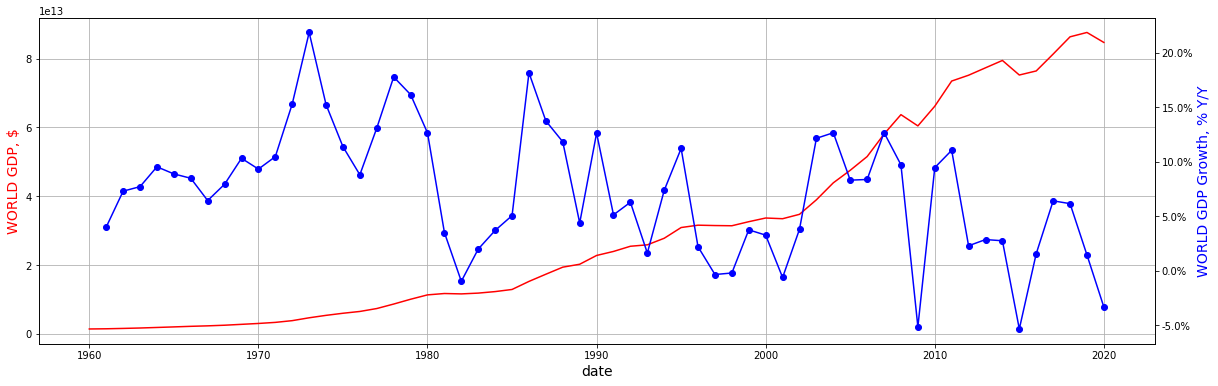

In [ ]:
# Visuals GDP_WORLD
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdp_world.NYGDPMKTPCDWLD, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("WORLD GDP, $",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdp_world.gdp_world_yoy, color="blue",marker="o")
ax2.set_ylabel("WORLD GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdp_world.NYGDPMKTPCDWLD.plot.line(figsize=(20,6), grid = True)

In [ ]:
# ?? GLOB_GDP_NO_INFLATION = gdp_world / gdpdef
 # https://fredblog.stlouisfed.org/2018/10/what-a-wonderful-world/

## 1.2 PRICES AND INFLATION
*CPI_full (CPIAUCSL), CPI (CPILFESL), GDPDEF*

In [ ]:
#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL), MONTHLY
#  Index 1982-1984=100, Seasonally Adjusted,
# The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change
# in the price for goods and services paid by urban consumers between any two time periods
# https://fred.stlouisfed.org/series/CPIAUCSL
cpiaucsl = pdr.DataReader("CPIAUCSL", "fred", start=start)

In [ ]:
cpiaucsl['cpi_full_yoy'] = cpiaucsl.CPIAUCSL/cpiaucsl.CPIAUCSL.shift(12)-1
cpiaucsl['cpi_full_mom'] = cpiaucsl.CPIAUCSL/cpiaucsl.CPIAUCSL.shift(1)-1

cpiaucsl.tail(13)

CPIAUCSL  cpi_full_yoy  cpi_full_mom
DATE                                            
2020-08-01   259.511      0.013248      0.003507
2020-09-01   260.149      0.014100      0.002458
2020-10-01   260.462      0.011947      0.001203
2020-11-01   260.927      0.011388      0.001785
2020-12-01   261.560      0.013001      0.002426
2021-01-01   262.231      0.013700      0.002565
2021-02-01   263.161      0.016757      0.003546
2021-03-01   264.793      0.026373      0.006202
2021-04-01   266.832      0.041531      0.007700
2021-05-01   268.551      0.049265      0.006442
2021-06-01   270.981      0.053245      0.009049
2021-07-01   272.265      0.052826      0.004738
2021-08-01   273.012      0.052025      0.002744

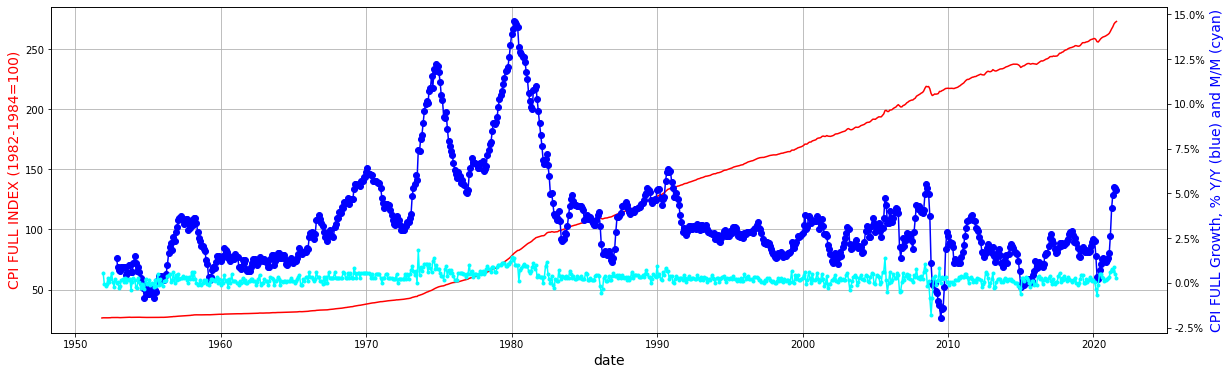

In [ ]:
# Visuals CPI_FULL
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cpiaucsl.CPIAUCSL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("CPI FULL INDEX (1982-1984=100)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpiaucsl.cpi_full_yoy, color="blue",marker="o")
ax2.plot(cpiaucsl.cpi_full_mom, color="cyan",marker=".")
ax2.set_ylabel("CPI FULL Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# OLD: gdp_world.NYGDPMKTPCDWLD.plot.line(figsize=(20,6), grid = True)

In [ ]:
# "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [ ]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

CPILFESL  cpi_core_yoy  cpi_core_mom
DATE                                            
2020-08-01   268.654      0.017047      0.003481
2020-09-01   269.155      0.017203      0.001865
2020-10-01   269.350      0.016315      0.000724
2020-11-01   269.819      0.016547      0.001741
2020-12-01   269.940      0.016145      0.000448
2021-01-01   270.025      0.013965      0.000315
2021-02-01   270.299      0.012826      0.001015
2021-03-01   271.214      0.016468      0.003385
2021-04-01   273.700      0.029582      0.009166
2021-05-01   275.718      0.037950      0.007373
2021-06-01   278.140      0.044532      0.008784
2021-07-01   279.054      0.042327      0.003286
2021-08-01   279.338      0.039769      0.001018

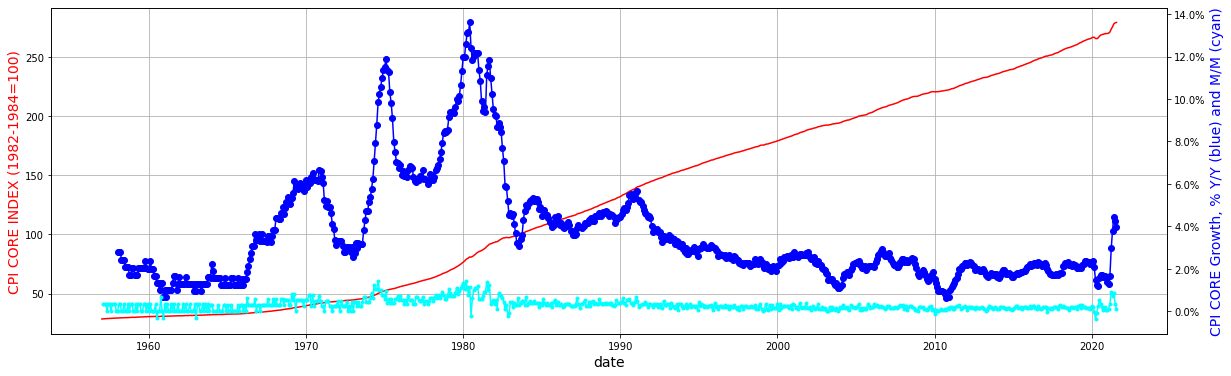

In [ ]:
# Visuals CPI_CORE
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cpilfesl.CPILFESL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("CPI CORE INDEX (1982-1984=100)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue",marker="o")
ax2.plot(cpilfesl.cpi_core_mom, color="cyan",marker=".")
ax2.set_ylabel("CPI CORE Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()


In [ ]:
# Index 2012=100, Seasonally Adjusted
#  Gross Domestic Product: Implicit Price Deflator (GDPDEF)
# https://fred.stlouisfed.org/series/GDPDEF
gdpdef = pdr.DataReader("GDPDEF", "fred", start=start)

In [ ]:
gdpdef.tail()

GDPDEF
DATE               
2020-04-01  112.859
2020-07-01  113.888
2020-10-01  114.439
2021-01-01  115.652
2021-04-01  117.413

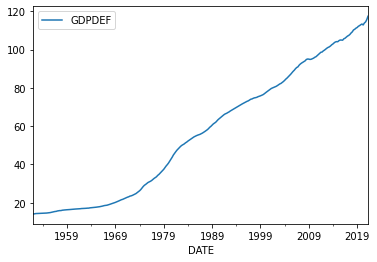

In [ ]:
gdpdef.plot.line()

## 1.3 MONEY SUPPLY
*M1 (M1SL, WM1NS), M2, M1V (M1 velocity), M2V (M2 velocity)*

In [ ]:
#  M1 Money Stock (M1SL)	, MONTHLY , $b
# Before May 2020, M1 consists of (1) currency outside the U.S. Treasury, Federal Reserve Banks,
# and the vaults of depository institutions; (2) demand deposits at commercial banks (excluding
# those amounts held by depository institutions, the U.S. government, and foreign banks and official institutions)
#  less cash items in the process of collection and Federal Reserve float; and (3) other checkable deposits (OCDs),
# consisting of negotiable order of withdrawal, or NOW, and automatic transfer service, or ATS, accounts at depository
# institutions, share draft accounts at credit unions, and demand deposits at thrift institutions.

# Beginning May 2020, M1 consists of (1) currency outside the U.S. Treasury,
# Federal Reserve Banks, and the vaults of depository institutions;
# (2) demand deposits at commercial banks (excluding those amounts held by depository institutions,
#  the U.S. government, and foreign banks and official institutions) less cash items in the process of collection and
#  Federal Reserve float; and (3) other liquid deposits, consisting of OCDs and savings deposits (including money market
# deposit accounts). Seasonally adjusted M1 is constructed by summing currency, demand deposits,
# and OCDs (before May 2020) or other liquid deposits (beginning May 2020), each seasonally adjusted separately.

# https://fred.stlouisfed.org/series/M1SL
m1sl = pdr.DataReader("M1SL", "fred", start=start)
m1sl.tail()

M1SL
DATE               
2021-04-01  18915.7
2021-05-01  19192.9
2021-06-01  19238.2
2021-07-01  19401.7
2021-08-01  19677.7

In [ ]:
m1sl['m1sl_yoy'] = m1sl.M1SL/m1sl.M1SL.shift(12)-1
m1sl['m1sl_mom'] = m1sl.M1SL/m1sl.M1SL.shift(1)-1

m1sl.tail(13)

M1SL  m1sl_yoy  m1sl_mom
DATE                                   
2020-08-01  16887.0  3.393080  0.006749
2020-09-01  17156.8  3.413098  0.015977
2020-10-01  17346.8  3.418329  0.011074
2020-11-01  17589.1  3.446633  0.013968
2020-12-01  17812.4  3.440666  0.012695
2021-01-01  18100.6  3.503533  0.016180
2021-02-01  18389.4  3.564939  0.015955
2021-03-01  18669.4  3.360685  0.015226
2021-04-01  18915.7  2.961901  0.013193
2021-05-01  19192.9  0.180230  0.014654
2021-06-01  19238.2  0.160060  0.002360
2021-07-01  19401.7  0.156667  0.008499
2021-08-01  19677.7  0.165257  0.014226

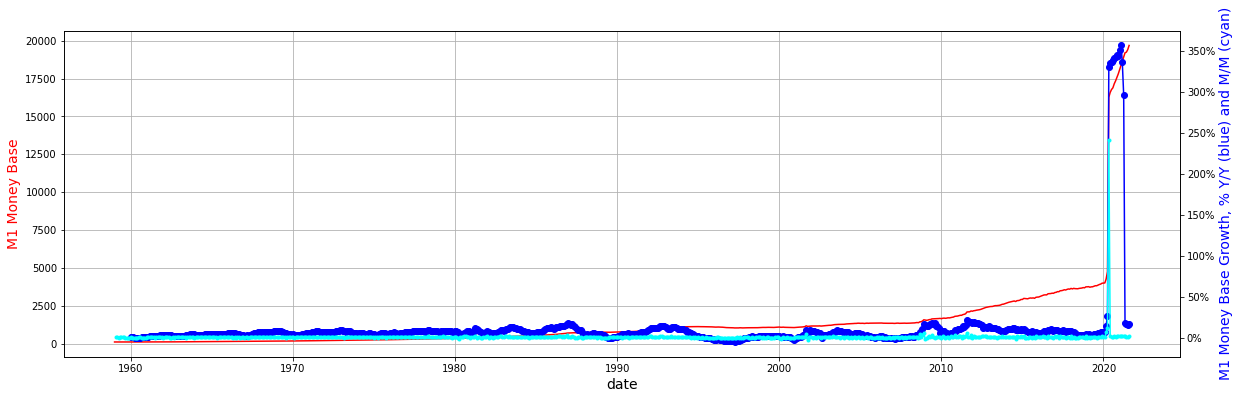

In [ ]:
# Visuals M1SL
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1sl.M1SL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Money Base",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1sl.m1sl_yoy, color="blue",marker="o")
ax2.plot(m1sl.m1sl_mom, color="cyan",marker=".")
ax2.set_ylabel("M1 Money Base Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()


In [ ]:
# M1 weekly $b -- WEEKLY VERSION Of money supply
# https://fred.stlouisfed.org/series/WM1NS ,
m1_weekly = pdr.DataReader("WM1NS", "fred", start=start)

In [ ]:
m1_weekly['m1weekly_wow'] = m1_weekly.WM1NS/m1_weekly.WM1NS.shift(1)-1
m1_weekly['m1weekly_mom'] = m1_weekly.WM1NS/m1_weekly.WM1NS.shift(5)-1

m1_weekly.tail()

WM1NS  m1weekly_wow  m1weekly_mom
DATE                                           
2021-08-09  19613.3      0.003063      0.010339
2021-08-16  19691.1      0.003967      0.014325
2021-08-23  19671.2     -0.001011      0.011108
2021-08-30  19713.3      0.002140      0.015375
2021-09-06  19857.5      0.007315      0.015552

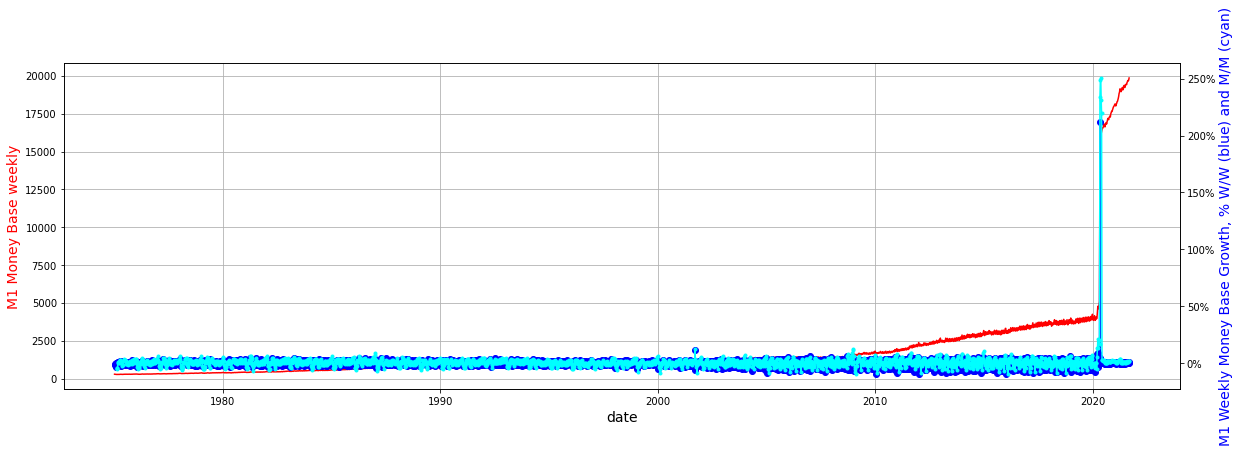

In [ ]:
# Visuals M1 WEEKLY
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1_weekly.WM1NS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Money Base weekly",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1_weekly.m1weekly_wow, color="blue",marker="o")
ax2.plot(m1_weekly.m1weekly_mom, color="cyan",marker=".")
ax2.set_ylabel("M1 Weekly Money Base Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
# M2 weekly - METRIC CHANGE!
# https://fred.stlouisfed.org/series/WM2NS
# Before May 2020, M2 consists of M1 plus (1) savings deposits (including money market deposit accounts);
# (2) small-denomination time deposits (time deposits in amounts of less than $100,000) less individual retirement account (IRA)
#  and Keogh balances at depository institutions; and
# (3) balances in retail money market funds (MMFs) less IRA and Keogh balances at MMFs.

# Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits
# (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and
# (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing
# savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted
# separately, and adding this result to seasonally adjusted M1.

m2_weekly = pdr.DataReader("WM2NS", "fred", start=start)

In [ ]:
m2_weekly['m2weekly_wow'] = m2_weekly.WM2NS/m2_weekly.WM2NS.shift(1)-1
m2_weekly['m2weekly_mom'] = m2_weekly.WM2NS/m2_weekly.WM2NS.shift(5)-1

m2_weekly.tail()

WM2NS  m2weekly_wow  m2weekly_mom
DATE                                           
2021-08-09  20720.3      0.002875      0.008876
2021-08-16  20798.1      0.003755      0.012595
2021-08-23  20776.5     -0.001039      0.009857
2021-08-30  20812.9      0.001752      0.013785
2021-09-06  20956.3      0.006890      0.014298

In [ ]:
# M1V - M1 velocity. Calculated as the ratio of quarterly nominal GDP (GDP) to the quarterly average of M1 money stock (M1SL)
# https://fred.stlouisfed.org/series/M1V
m1v = pdr.DataReader("M1V", "fred", start=start)

In [ ]:
m1v['m1v_qoq'] = m1v.M1V/m1v.M1V.shift(1)-1
m1v['m1v_yoy'] = m1v.M1V/m1v.M1V.shift(5)-1
m1v.tail()

M1V   m1v_qoq   m1v_yoy
DATE                                 
2020-04-01  1.553 -0.702889 -0.721385
2020-07-01  1.248 -0.196394 -0.778015
2020-10-01  1.222 -0.020833 -0.780729
2021-01-01  1.199 -0.018822 -0.780885
2021-04-01  1.190 -0.007506 -0.772336

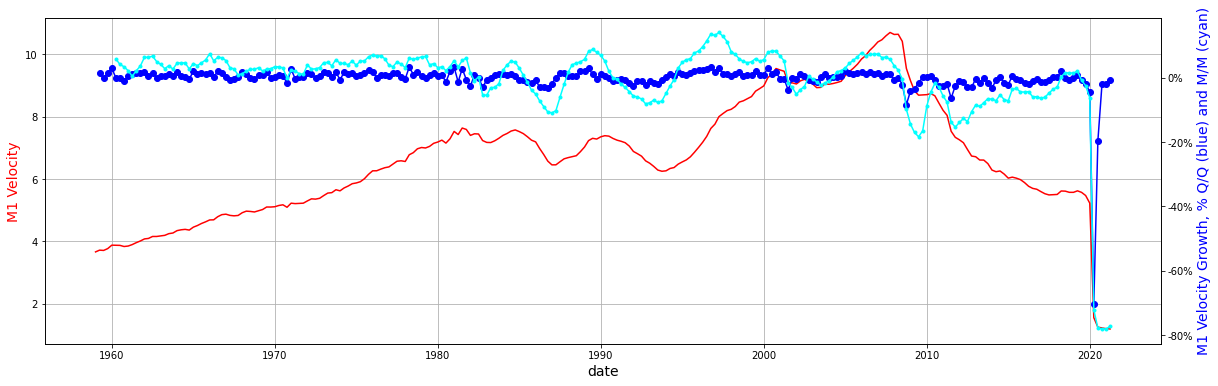

In [ ]:
# Visuals M1 Velocity
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1v.M1V, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Velocity",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1v.m1v_qoq, color="blue",marker="o")
ax2.plot(m1v.m1v_yoy, color="cyan",marker=".")
ax2.set_ylabel("M1 Velocity Growth, % Q/Q (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# m1v.plot.line(figsize=(20,6), grid = True)

In [ ]:
# M2V - M2 velocity
m2v = pdr.DataReader("M2V", "fred", start=start)

In [ ]:
m2v['m2v_qoq'] = m2v.M2V/m2v.M2V.shift(1)-1
m2v['m2v_yoy'] = m2v.M2V/m2v.M2V.shift(5)-1

m2v.tail()

M2V   m2v_qoq   m2v_yoy
DATE                                 
2020-04-01  1.100 -0.199418 -0.241379
2020-07-01  1.147  0.042727 -0.209511
2020-10-01  1.134 -0.011334 -0.211953
2021-01-01  1.121 -0.011464 -0.212228
2021-04-01  1.121  0.000000 -0.184134

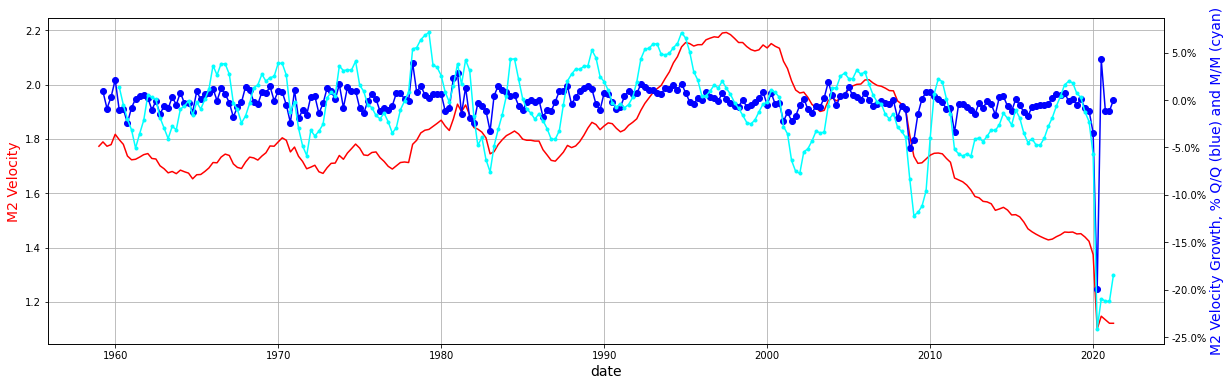

In [ ]:
# Visuals M2 Velocity
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m2v.M2V, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M2 Velocity",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m2v.m2v_qoq, color="blue",marker="o")
ax2.plot(m2v.m2v_yoy, color="cyan",marker=".")
ax2.set_ylabel("M2 Velocity Growth, % Q/Q (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# m1v.plot.line(figsize=(20,6), grid = True)

In [ ]:
#  (FED) Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)	==> y/y, period-to-period?
# https://fred.stlouisfed.org/series/WALCL
walcl = pdr.DataReader("WALCL", "fred", start=start)

In [ ]:
walcl['walcl_wow'] = walcl.WALCL/walcl.WALCL.shift(1)-1
walcl['walcl_mom'] = walcl.WALCL/walcl.WALCL.shift(5)-1
walcl.tail()

WALCL  walcl_wow  walcl_mom
DATE                                       
2021-09-01  8349173.0   0.001972   0.015532
2021-09-08  8357314.0   0.000975   0.014844
2021-09-15  8448770.0   0.010943   0.023205
2021-09-22  8489824.0   0.004859   0.017648
2021-09-29  8447981.0  -0.004929   0.013830

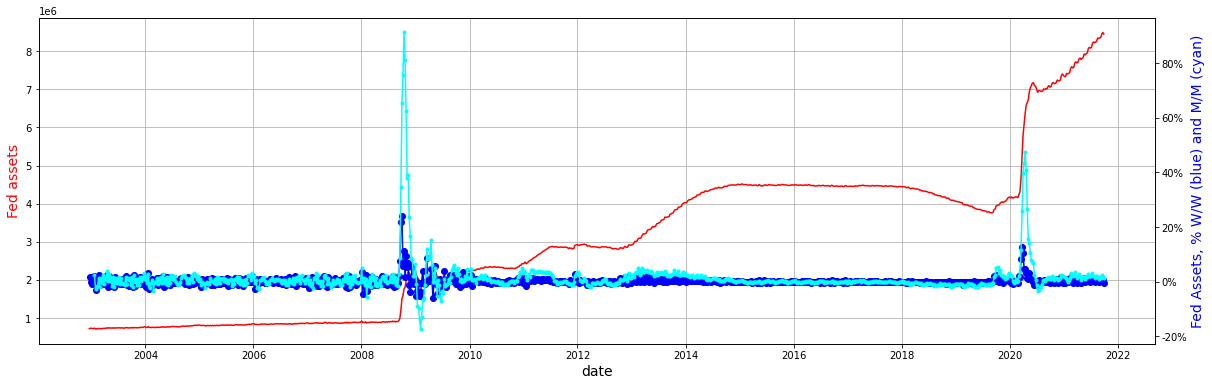

In [ ]:
# Fed assets (QE programs)
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(walcl.WALCL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Fed assets",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(walcl.walcl_wow, color="blue",marker="o")
ax2.plot(walcl.walcl_mom, color="cyan",marker=".")
ax2.set_ylabel("Fed Assets, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()


## 1.4) INTEREST RATES
*DFF, DTB3, DGS5, DGS10, DGS30, T5YIE, T10YIE*

*NO TRASFORMATIONS TO INTEREST RATES*

In [ ]:
# DFF Effective Federal Funds Rate, D from 1954
# https://fred.stlouisfed.org/series/DFF
dff = pdr.DataReader("DFF", "fred", start=start)
dff.tail()

DFF
DATE            
2021-10-01  0.08
2021-10-02  0.08
2021-10-03  0.08
2021-10-04  0.08
2021-10-05  0.08

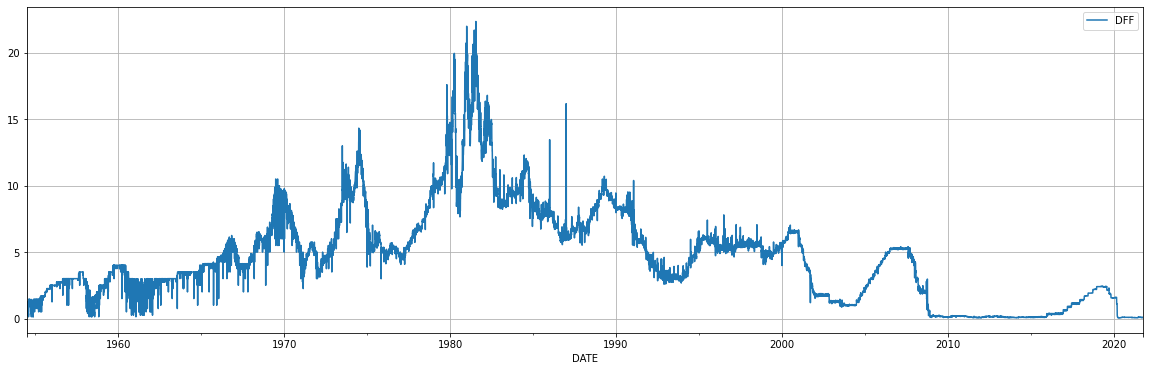

In [ ]:
dff.plot.line(figsize=(20,6), grid=True)

In [ ]:
# DTB3  3-Month Treasury Bill: Secondary Market Rate, D from 1954
# https://fred.stlouisfed.org/series/DTB3
dtb3 = pdr.DataReader("DTB3", "fred", start=start)
dtb3.tail()

DTB3
DATE            
2021-09-29  0.04
2021-09-30  0.04
2021-10-01  0.04
2021-10-04  0.04
2021-10-05  0.04

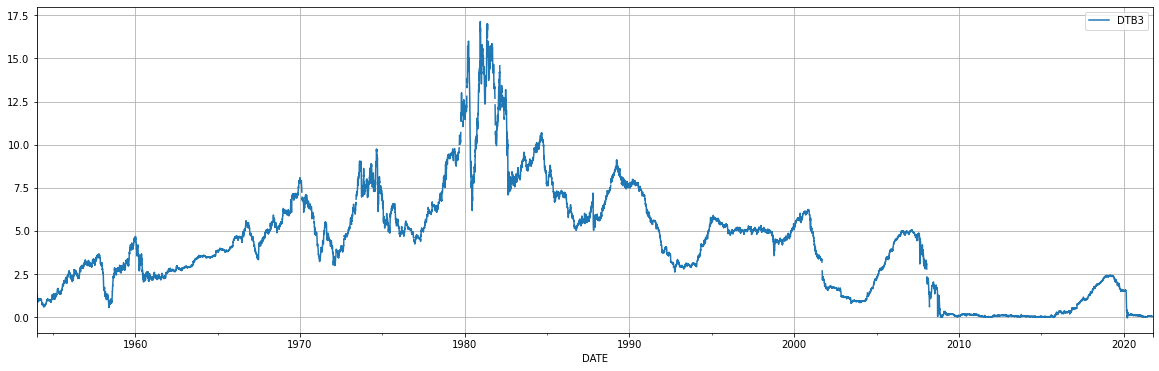

In [ ]:
dtb3.plot.line(figsize=(20,6), grid=True)

In [ ]:
# DGS5  5-Year Treasury Constant Maturity Rate, D from 1962
# https://fred.stlouisfed.org/series/DGS5

dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

DGS5
DATE            
2021-09-29  1.01
2021-09-30  0.98
2021-10-01  0.93
2021-10-04  0.95
2021-10-05  0.98

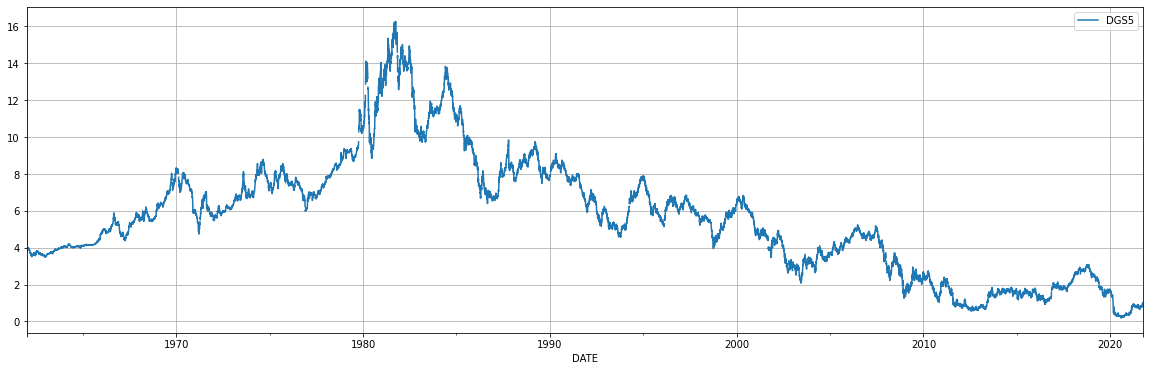

In [ ]:
dgs5.plot.line(figsize=(20,6), grid=True)

In [ ]:
# DGS10 10-Year Treasury Constant Maturity Rate, D from 1962
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

DGS10
DATE             
2021-09-29   1.55
2021-09-30   1.52
2021-10-01   1.48
2021-10-04   1.49
2021-10-05   1.54

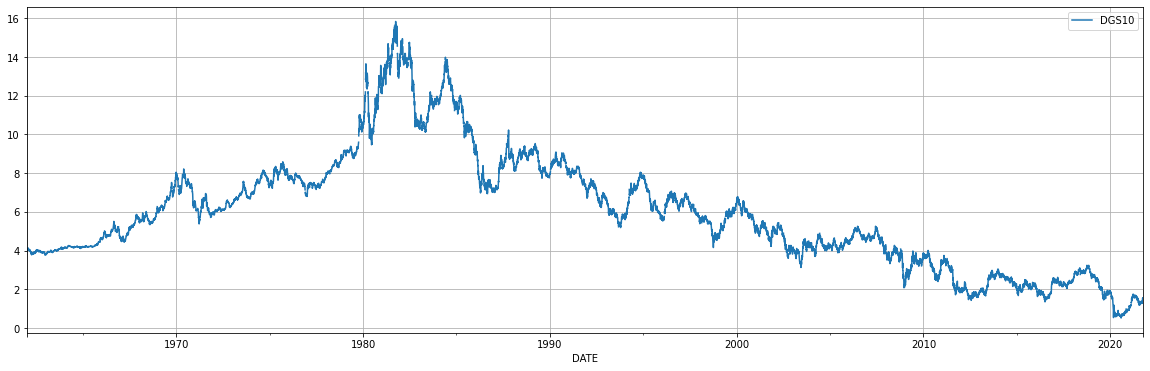

In [ ]:
dgs10.plot.line(figsize=(20,6), grid=True)

In [ ]:
# DGS30 30-Year Treasury Constant Maturity Rate, D from 1977
# https://fred.stlouisfed.org/series/DGS30
dgs30 = pdr.DataReader("DGS30", "fred", start=start)
dgs30.tail()

DGS30
DATE             
2021-09-29   2.09
2021-09-30   2.08
2021-10-01   2.04
2021-10-04   2.05
2021-10-05   2.10

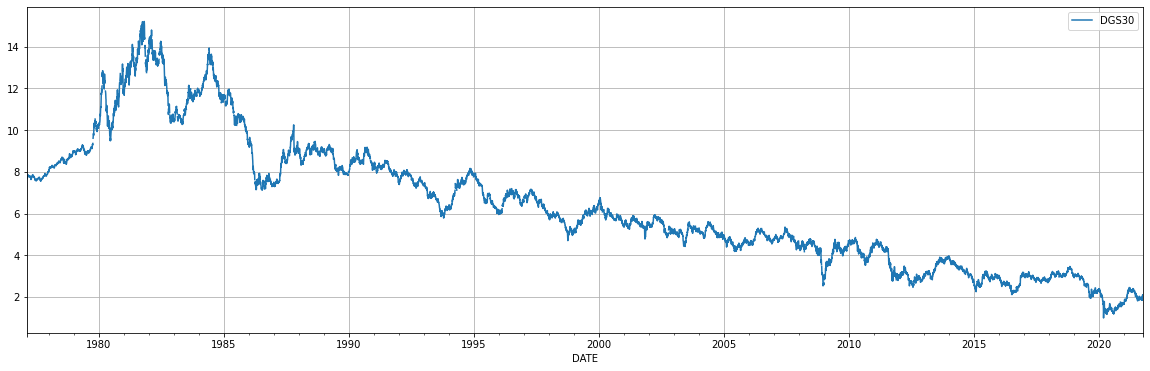

In [ ]:
dgs30.plot.line(figsize=(20,6), grid=True)

In [ ]:
# T5YIE 5-year Breakeven Inflation Rate, D from 2003
# https://fred.stlouisfed.org/series/T5YIE

t5yie = pdr.DataReader("T5YIE", "fred", start=start)
t5yie.tail()

T5YIE
DATE             
2021-09-30   2.51
2021-10-01   2.51
2021-10-04   2.53
2021-10-05   2.59
2021-10-06   2.57

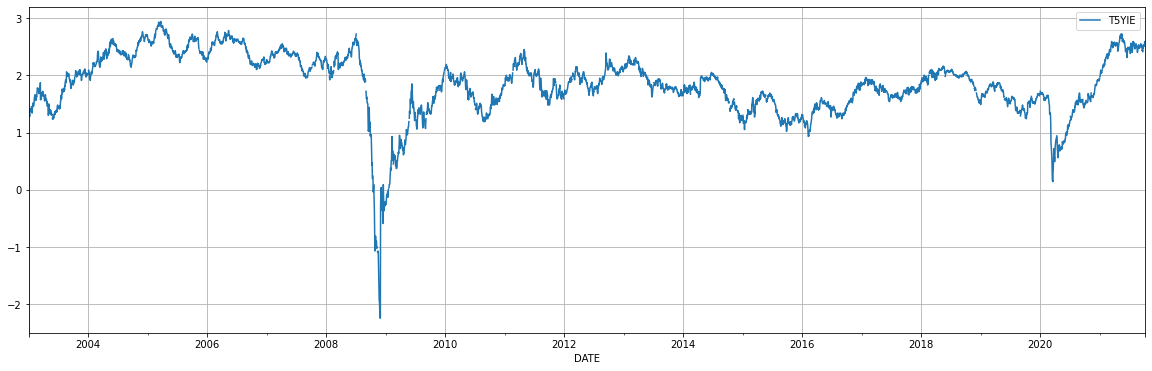

In [ ]:
t5yie.plot.line(figsize=(20,6), grid=True)

In [ ]:
# T10YIE  10-year Breakeven Inflation Rate, D from 2003
# https://fred.stlouisfed.org/series/T10YIE

t10yie = pdr.DataReader("T10YIE", "fred", start=start)
t10yie.tail()

T10YIE
DATE              
2021-09-30    2.37
2021-10-01    2.38
2021-10-04    2.38
2021-10-05    2.45
2021-10-06    2.43

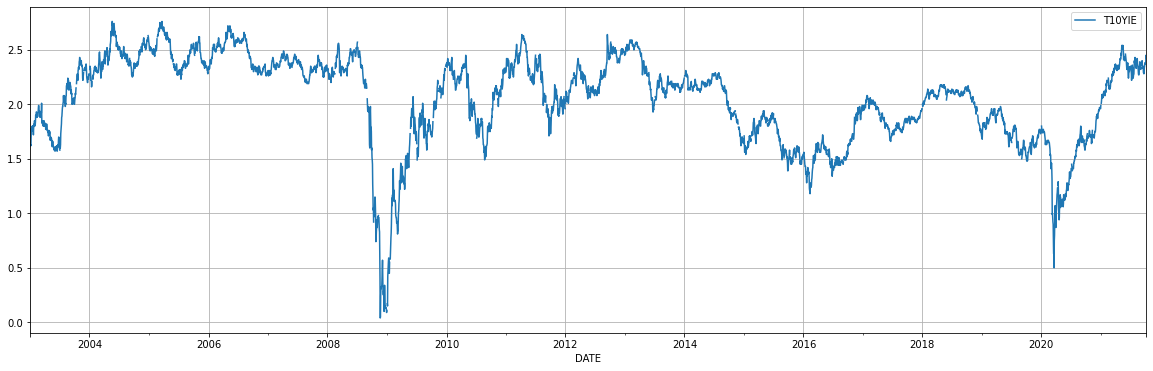

In [ ]:
t10yie.plot.line(figsize=(20,6), grid=True)

In [ ]:
# T5YIFR  5-Year, 5-Year Forward Inflation Expectation Rate, D from 2003
# https://fred.stlouisfed.org/series/T5YIFR

t5yifr = pdr.DataReader("T5YIFR", "fred", start=start)
t5yifr.tail()

T5YIFR
DATE              
2021-09-30    2.23
2021-10-01    2.25
2021-10-04    2.23
2021-10-05    2.31
2021-10-06    2.29

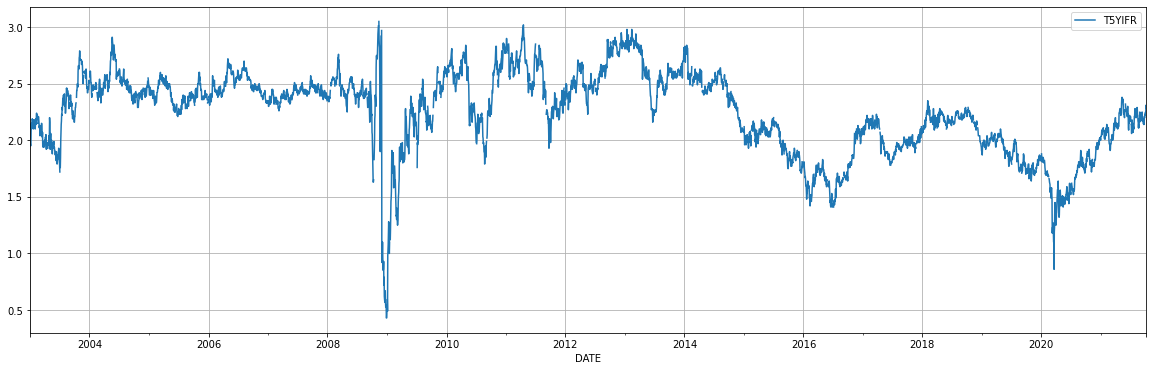

In [ ]:
t5yifr.plot.line(figsize=(20,6), grid=True)

In [ ]:
# TEDRATE TED Spread, D from 1986
# https://fred.stlouisfed.org/series/TEDRATE
# calculated as the spread between 3-Month LIBOR based on US dollars .
# LIBOR is the rate banks would charge each other for lending, which can be used to measure economy-wide credit risk.
# Treasuries are basically the safest assets on the market.
# So, a large TED spread would indicate a lot of credit risk in the U.S. economy.*

tedrate = pdr.DataReader("TEDRATE", "fred", start=start)
tedrate.tail()

TEDRATE
DATE               
2021-09-23     0.10
2021-09-24     0.10
2021-09-27     0.09
2021-09-28     0.09
2021-09-29     0.09

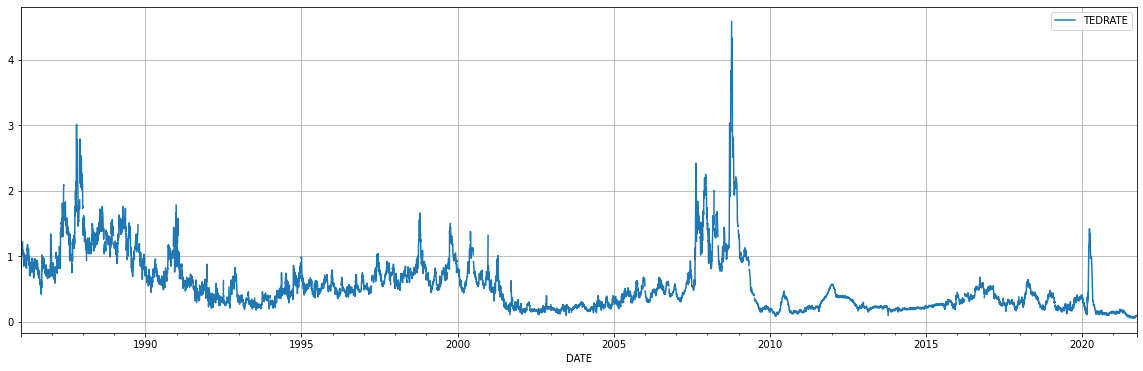

In [ ]:
tedrate.plot.line(figsize=(20,6), grid=True)

In [ ]:
# DPRIME  Bank Prime Loan Rate, D from 1955
# https://fred.stlouisfed.org/series/DPRIME

dprime = pdr.DataReader("DPRIME", "fred", start=start)
dprime.tail()

DPRIME
DATE              
2021-09-29    3.25
2021-09-30    3.25
2021-10-01    3.25
2021-10-04    3.25
2021-10-05    3.25

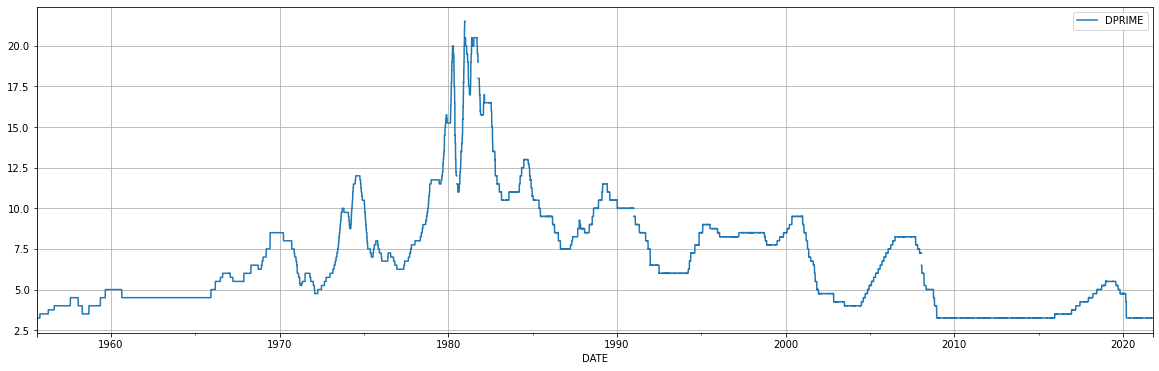

In [ ]:
dprime.plot.line(figsize=(20,6), grid=True)

## 1.5) EMPLOYMENT
*UNRATE, NROU, NROUST, CIVPART, EMRATIO, UNEMPLOY, ICSA, IC4WSA*

In [ ]:
# UNRATE  Civilian Unemployment Rate, M from 1948
# The unemployment rate represents the number of unemployed as a percentage of the labor force/
# https://fred.stlouisfed.org/series/UNRATE

unrate = pdr.DataReader("UNRATE", "fred", start=start)
unrate['unrate_mom'] = unrate.UNRATE/unrate.UNRATE.shift(1)-1


In [ ]:
unrate.tail()

UNRATE  unrate_mom
DATE                          
2021-04-01     6.1    0.016667
2021-05-01     5.8   -0.049180
2021-06-01     5.9    0.017241
2021-07-01     5.4   -0.084746
2021-08-01     5.2   -0.037037

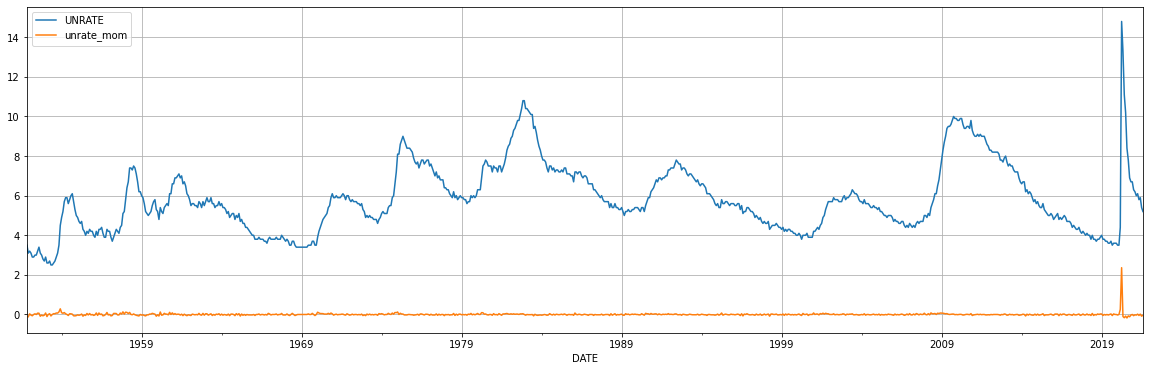

In [ ]:
unrate.plot.line(figsize=(20,6), grid=True)

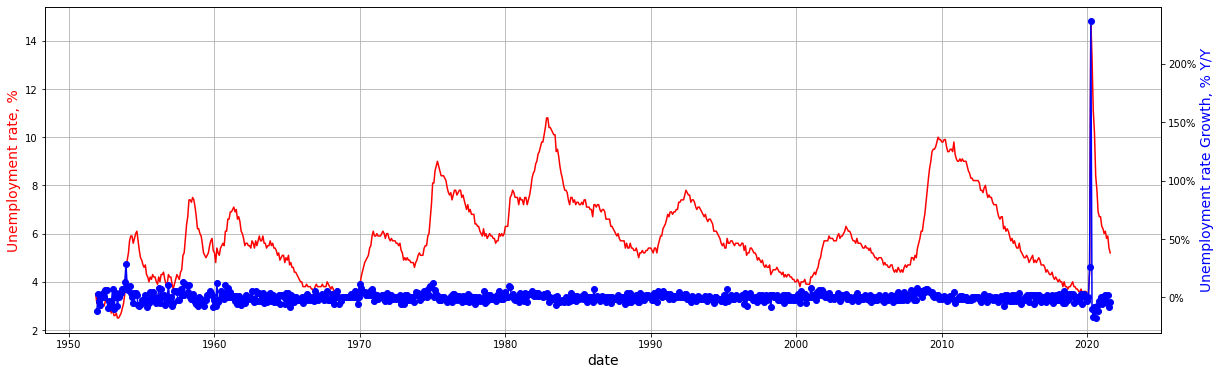

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(unrate.UNRATE, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Unemployment rate, %",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(unrate.unrate_mom, color="blue",marker="o")
ax2.set_ylabel("Unemployment rate Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

In [ ]:
# "Noncyclical Rate of Unemployment"
# Starting with the July, 2021 report: An Update to the Budget and Economic Outlook: 2021 to 2031,
# this series was renamed from "Natural Rate of Unemployment (Long-Term)" to "Noncyclical Rate of Unemployment".
# https://fred.stlouisfed.org/series/NROU

nrou = pdr.DataReader("NROU", "fred", start=start)
nrou.tail()

NROU
DATE                
2020-10-01  4.480756
2021-01-01  4.471833
2021-04-01  4.463892
2021-07-01  4.456865
2021-10-01  4.450651

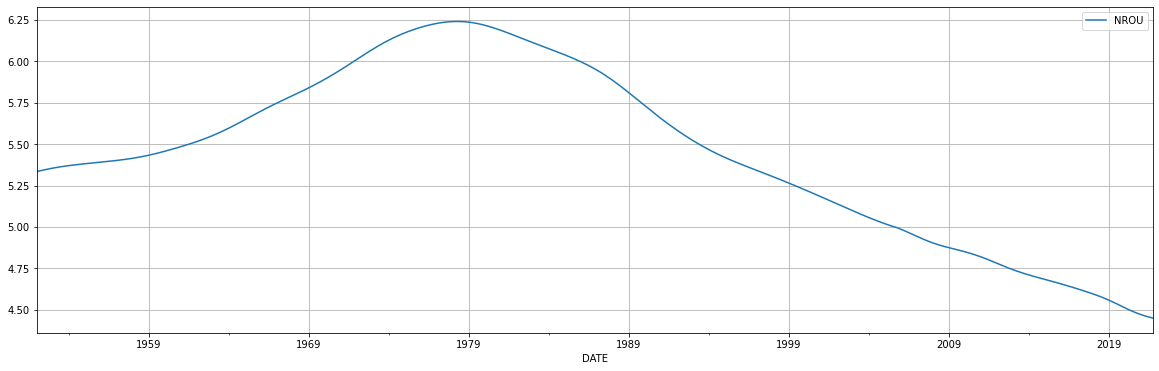

In [ ]:
nrou.plot.line(figsize=(20,6), grid=True)

In [ ]:
# CIVPART Civilian Labor Force Participation Rate, M from 1948
# https://fred.stlouisfed.org/series/CIVPART
civpart = pdr.DataReader("CIVPART", "fred", start=start)
civpart.tail()

CIVPART
DATE               
2021-04-01     61.7
2021-05-01     61.6
2021-06-01     61.6
2021-07-01     61.7
2021-08-01     61.7

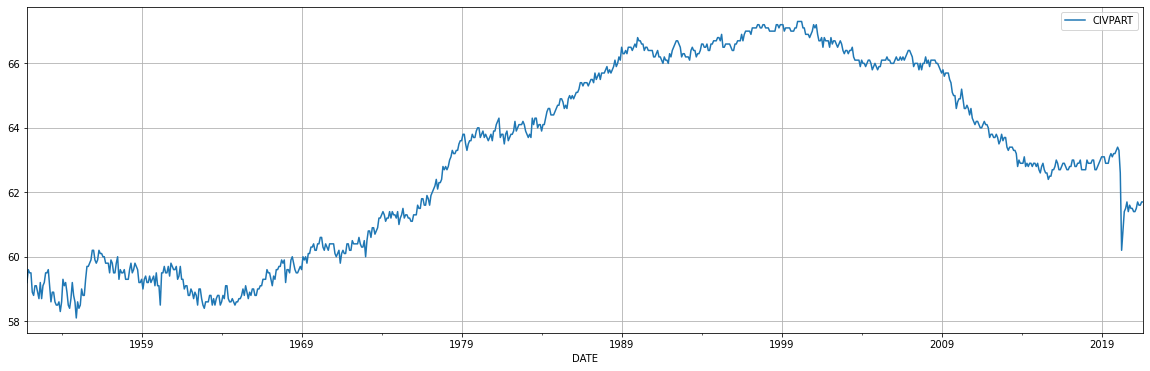

In [ ]:
civpart.plot.line(figsize=(20,6), grid=True)

In [ ]:
# EMRATIO Civilian Employment-Population Ratio, M from 1948
# https://fred.stlouisfed.org/series/EMRATIO

emratio = pdr.DataReader("EMRATIO", "fred", start=start)
emratio.tail()

EMRATIO
DATE               
2021-04-01     57.9
2021-05-01     58.0
2021-06-01     58.0
2021-07-01     58.4
2021-08-01     58.5

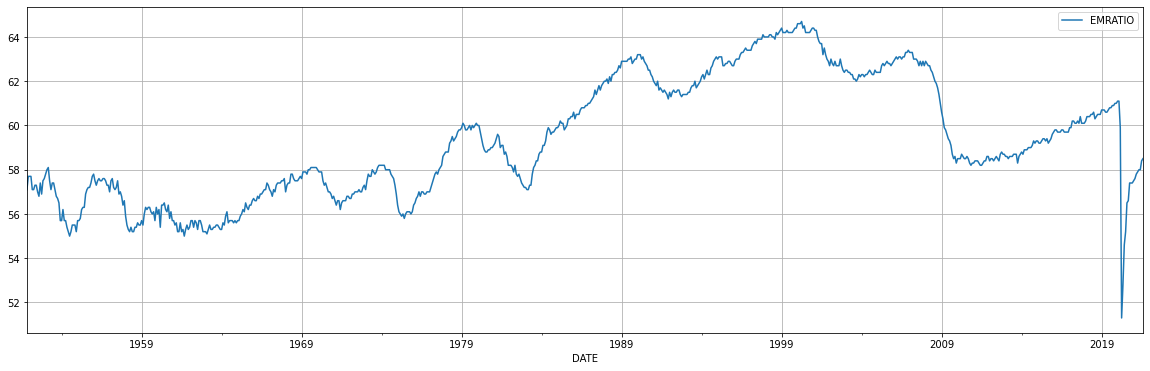

In [ ]:
emratio.plot.line(figsize=(20,6), grid=True)

In [ ]:
# UNEMPLOY  Unemployed, M from 1948 => make y/y ?
# https://fred.stlouisfed.org/series/UNEMPLOY
# https://fredblog.stlouisfed.org/2017/06/the-recent-evolution-of-labor-force-participation/
unemploy = pdr.DataReader("UNEMPLOY", "fred", start=start)
unemploy.tail()

UNEMPLOY
DATE                
2021-04-01      9812
2021-05-01      9316
2021-06-01      9484
2021-07-01      8702
2021-08-01      8384

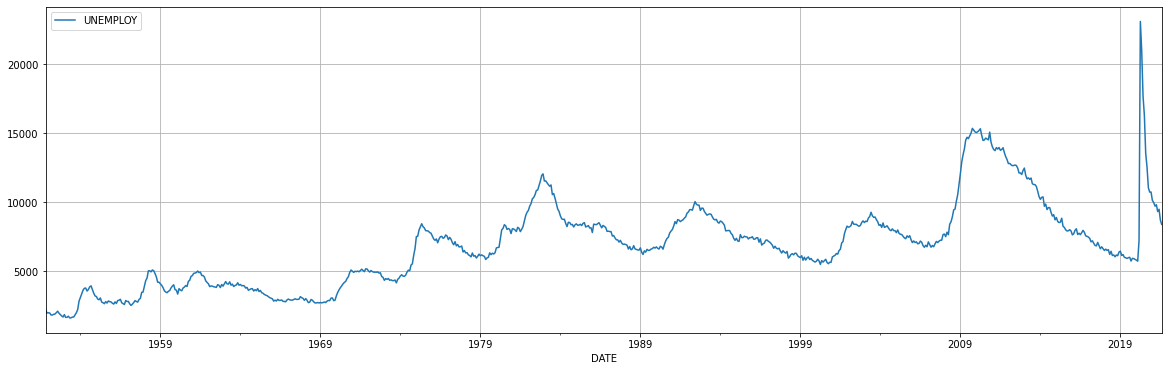

In [ ]:
unemploy.plot.line(figsize=(20,6), grid=True)

In [ ]:
# PAYEMS (All Employees, Total Nonfarm (PAYEMS) - THousands of persons => make y/y ?
# https://fred.stlouisfed.org/series/PAYEMS
# All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers
# in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the
# unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute
# to Gross Domestic Product (GDP).
payems = pdr.DataReader("PAYEMS", "fred", start=start)

payems['payems_yoy'] = payems.PAYEMS / payems.PAYEMS.shift(12)-1
payems['payems_mom'] = payems.PAYEMS / payems.PAYEMS.shift(1)-1

In [ ]:
payems.tail(13)

PAYEMS  payems_yoy  payems_mom
DATE                                      
2020-08-01  141149   -0.065907    0.011342
2020-09-01  141865   -0.062539    0.005073
2020-10-01  142545   -0.059258    0.004793
2020-11-01  142809   -0.058969    0.001852
2020-12-01  142503   -0.061980   -0.002143
2021-01-01  142736   -0.062391    0.001635
2021-02-01  143272   -0.060653    0.003755
2021-03-01  144057   -0.044968    0.005479
2021-04-01  144326    0.108827    0.001867
2021-05-01  144940    0.089824    0.004254
2021-06-01  145902    0.058488    0.006637
2021-07-01  146955    0.052943    0.007217
2021-08-01  147190    0.042799    0.001599

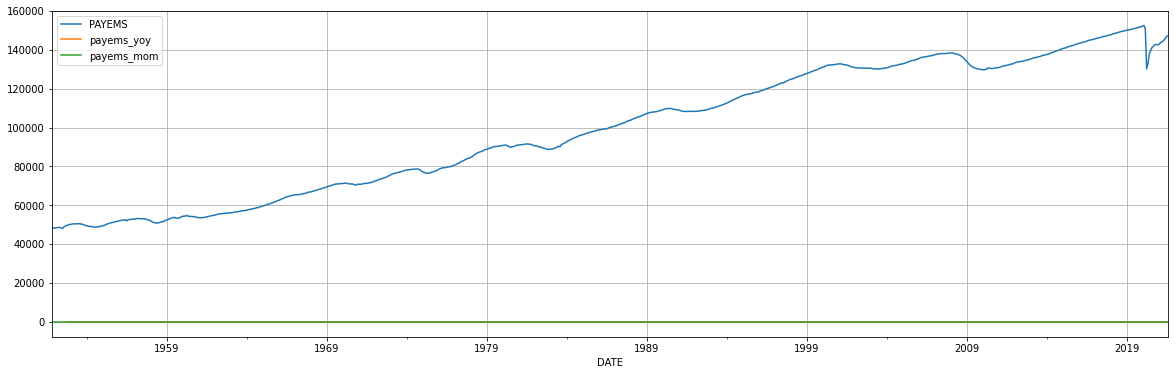

In [ ]:
payems.plot.line(figsize=(20,6), grid=True)

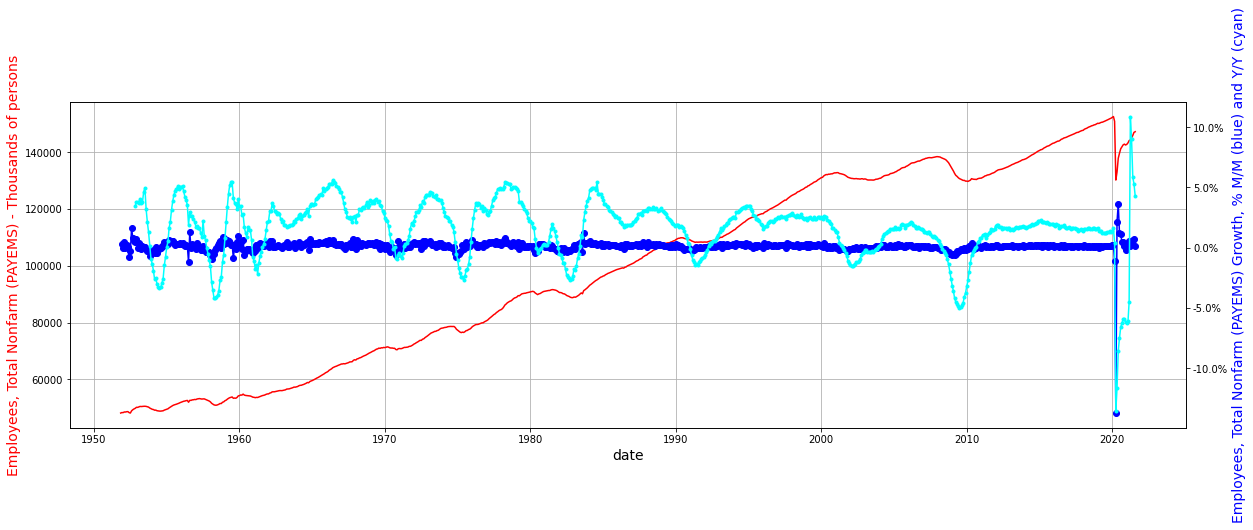

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(payems.PAYEMS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Employees, Total Nonfarm (PAYEMS) - Thousands of persons",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(payems['payems_mom'], color="blue",marker="o")
ax2.plot(payems['payems_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Employees, Total Nonfarm (PAYEMS) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
# MANEMP  All Employees: Manufacturing, M from 1939 =>  make MANEMP/PAYEMS? => or y/y?

# https://fred.stlouisfed.org/series/MANEMP

manemp = pdr.DataReader("MANEMP", "fred", start=start)

manemp['manemp_yoy'] = manemp.MANEMP / manemp.MANEMP.shift(12)-1
manemp['manemp_mom'] = manemp.MANEMP / manemp.MANEMP.shift(1)-1

In [ ]:
manemp.tail()

MANEMP  manemp_yoy  manemp_mom
DATE                                      
2021-04-01   12264    0.074470   -0.002846
2021-05-01   12300    0.055160    0.002935
2021-06-01   12332    0.027752    0.002602
2021-07-01   12384    0.028828    0.004217
2021-08-01   12421    0.029251    0.002988

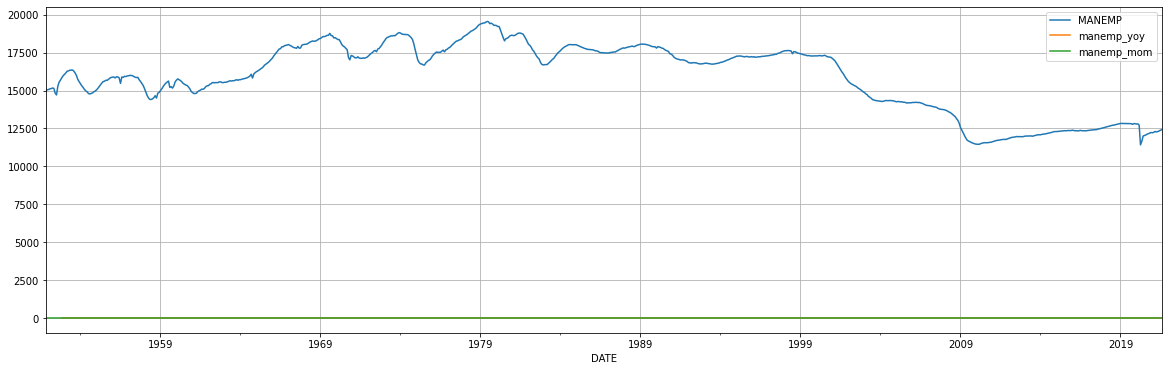

In [ ]:
manemp.plot.line(figsize=(20,6), grid=True)

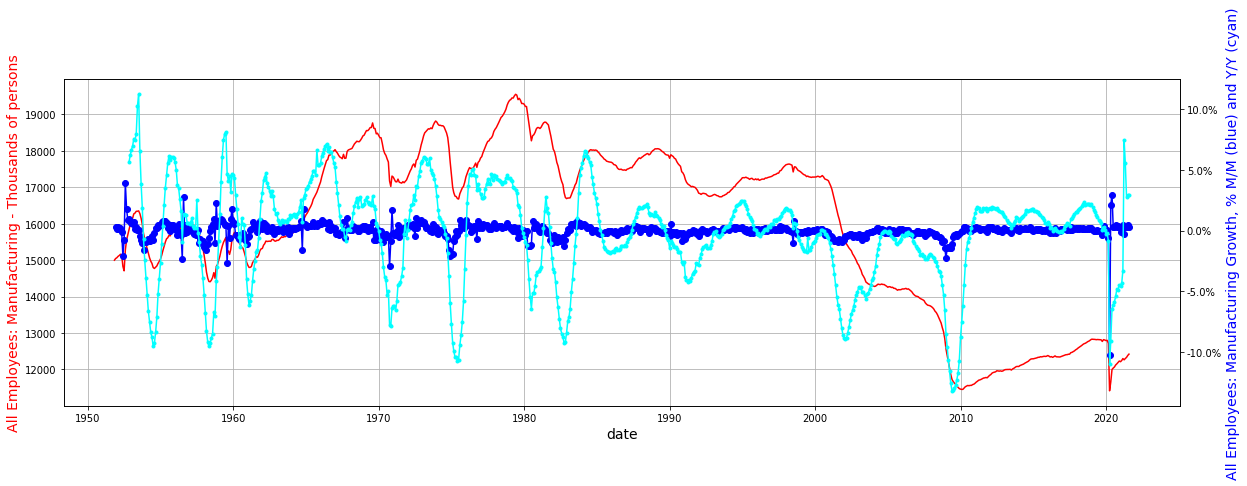

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(manemp.MANEMP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("All Employees: Manufacturing - Thousands of persons",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(manemp['manemp_mom'], color="blue",marker="o")
ax2.plot(manemp['manemp_yoy'], color="cyan",marker=".")
ax2.set_ylabel("All Employees: Manufacturing Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
# ICSA  Initial Claims (claims for unemployment), W from 1967 -> divite to the labour force?
  # An initial claim is a claim filed by an unemployed individual after a separation from an employer.
  # The claim requests a determination of basic eligibility for the Unemployment Insurance program.
# https://fred.stlouisfed.org/series/ICSA

icsa = pdr.DataReader("ICSA", "fred", start=start)
icsa['icsa_wow'] = icsa.ICSA / icsa.ICSA.shift(1)-1
icsa['icsa_mom'] = icsa.ICSA / icsa.ICSA.shift(4)-1

In [ ]:
icsa.tail()

ICSA  icsa_wow  icsa_mom
DATE                                  
2021-09-04  312000 -0.095652 -0.172414
2021-09-11  335000  0.073718 -0.040115
2021-09-18  351000  0.047761 -0.008475
2021-09-25  364000  0.037037  0.055072
2021-10-02  326000 -0.104396  0.044872

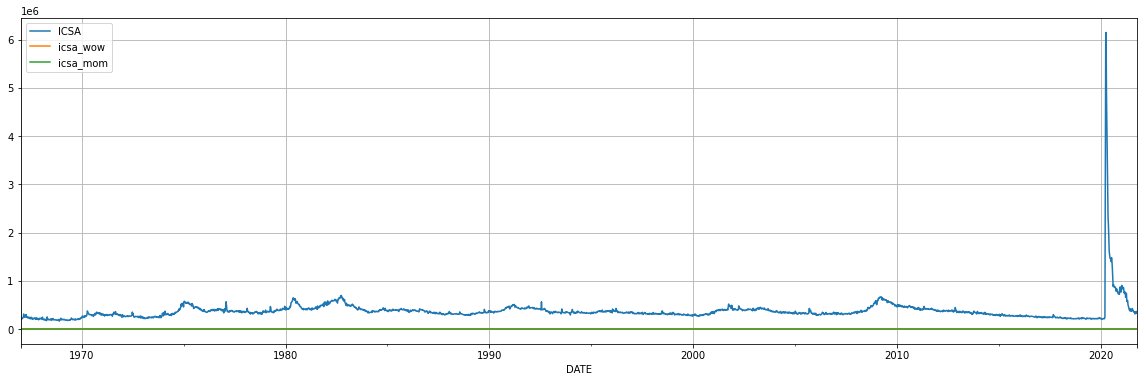

In [ ]:
icsa.plot.line(figsize=(20,6), grid=True)

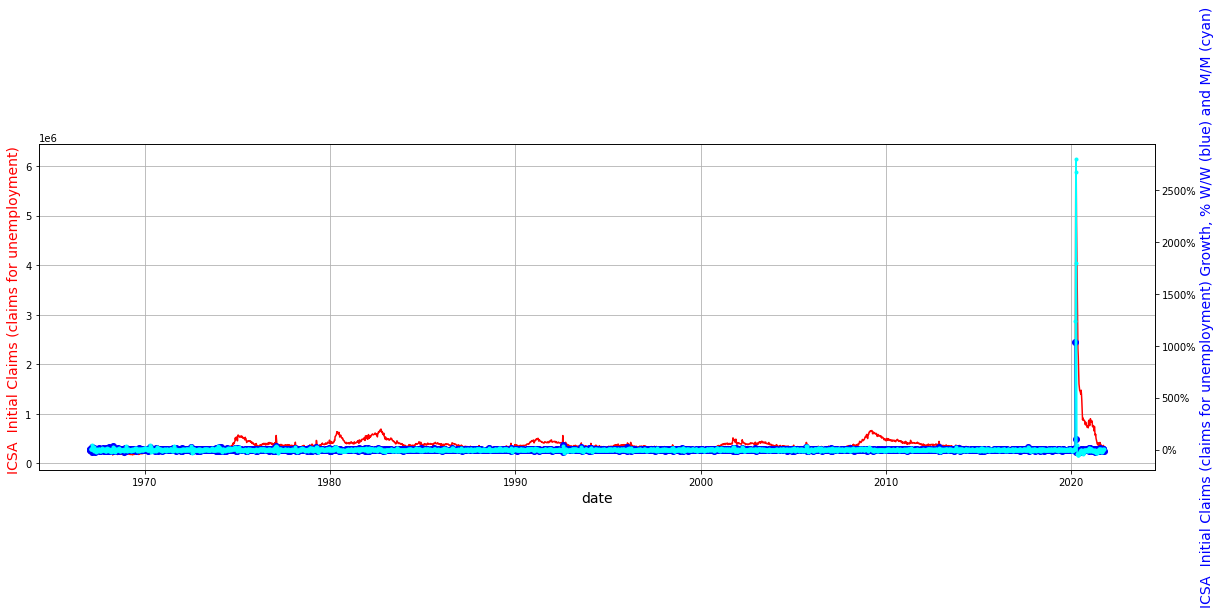

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(icsa.ICSA, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("ICSA  Initial Claims (claims for unemployment) ",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(icsa['icsa_wow'], color="blue",marker="o")
ax2.plot(icsa['icsa_mom'], color="cyan",marker=".")
ax2.set_ylabel("ICSA  Initial Claims (claims for unemployment) Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
# IC4WSA  4-Week Moving Average of Initial Claims, W from 1967 ==> make y/y? make icsa/ic4wsa ?
# https://fred.stlouisfed.org/series/IC4WSA

ic4wsa = pdr.DataReader("IC4WSA", "fred", start=start)

ic4wsa['ic4wsa_qoq'] = ic4wsa.IC4WSA / ic4wsa.IC4WSA.shift(13)-1
ic4wsa['ic4wsa_yoy'] = ic4wsa.IC4WSA / ic4wsa.IC4WSA.shift(52)-1

In [ ]:
ic4wsa.tail()

IC4WSA  ic4wsa_qoq  ic4wsa_yoy
DATE                                      
2021-09-04  340000   -0.155804   -0.616685
2021-09-11  336500   -0.150789   -0.614106
2021-09-18  335750   -0.158521   -0.613636
2021-09-25  340500   -0.135787   -0.599882
2021-10-02  344000   -0.133501   -0.583661

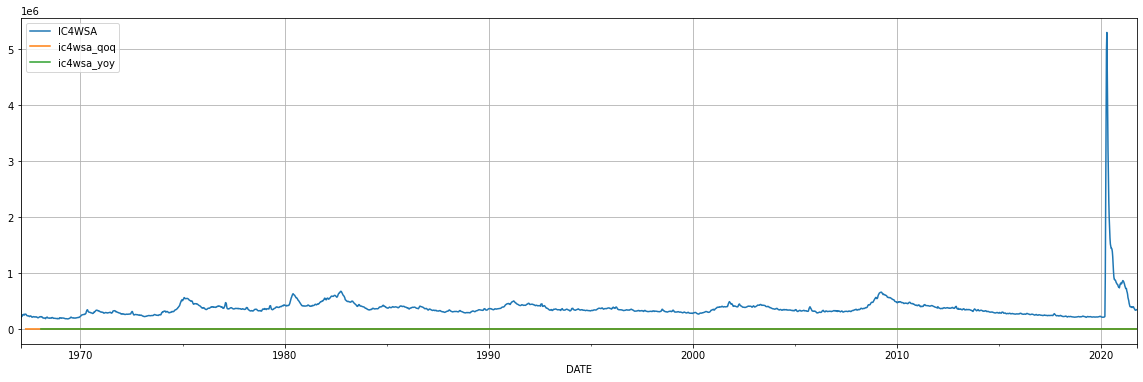

In [ ]:
ic4wsa.plot.line(figsize=(20,6), grid=True)

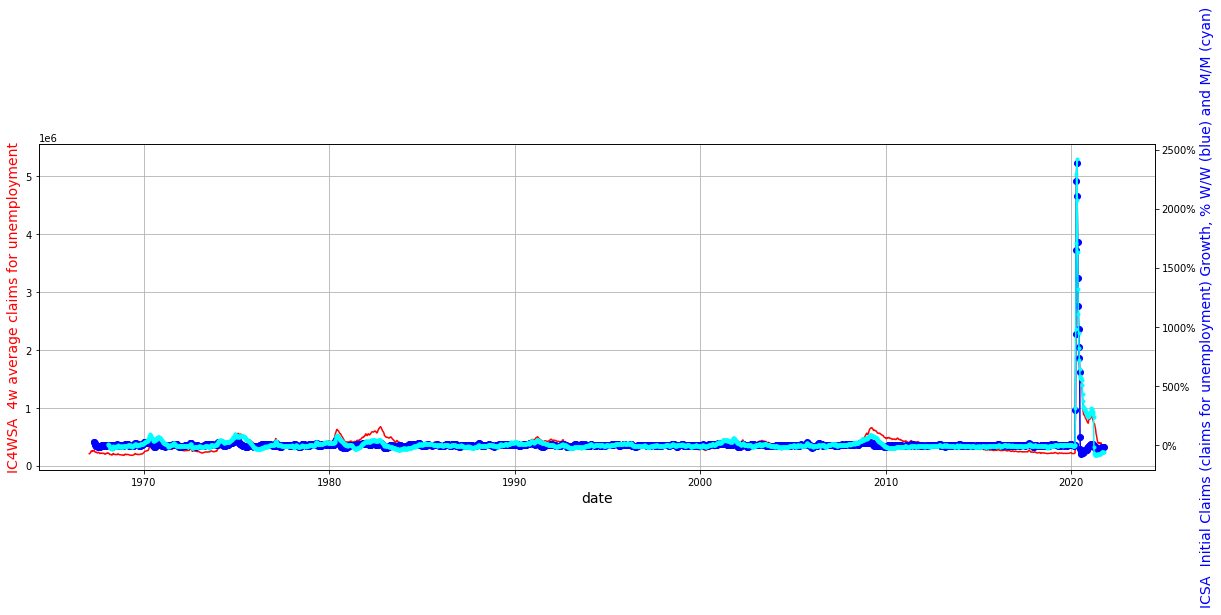

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(ic4wsa.IC4WSA, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("IC4WSA  4w average claims for unemployment",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(ic4wsa['ic4wsa_qoq'], color="blue",marker="o")
ax2.plot(ic4wsa['ic4wsa_yoy'], color="cyan",marker=".")
ax2.set_ylabel("ICSA  Initial Claims (claims for unemployment) Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

## 1.6) INCOME AND EXPENDITURE
*CDSP, MDSP, FODSP, DSPIC96, PCE, PCEDG, **PSAVERT**, RRSFS, DSPI*

In [ ]:
# (QUARTERLY) HOUSEHOLD FINANCIAL OBLIGATIONS as %% of disposable income: CDSP, FODSP, MDSP, TDSP
  # Article: https://fredblog.stlouisfed.org/2019/10/households-lightening-debt-load/
    # This FRED graph shows the percentage of disposable (i.e., after-tax) income that households dedicate
    # to servicing specific types of debt. The graph has four lines (CDSP, FODSP, MDSP, TDSP). Let’s start at the bottom: The green
    # line shows mortgage debt, and the red line shows consumer debt (credit card, auto, and personal loans).
    # The blue line is the sum of the red and green lines. And the purple line adds to the blue line some other
    # financial commitments, such as rent, auto leases, homeowners’ insurance, and property taxes.

cdsp = pdr.DataReader("CDSP", "fred", start=start)
fodsp = pdr.DataReader("FODSP", "fred", start=start)
mdsp = pdr.DataReader("MDSP", "fred", start=start)
tdsp = pdr.DataReader("TDSP", "fred", start=start)


In [ ]:
# Consumer debt (credit card, auto, and pers loans)
cdsp.tail()

CDSP
DATE                
2020-01-01  5.723051
2020-04-01  5.093614
2020-07-01  5.308508
2020-10-01  5.415759
2021-01-01  4.777255

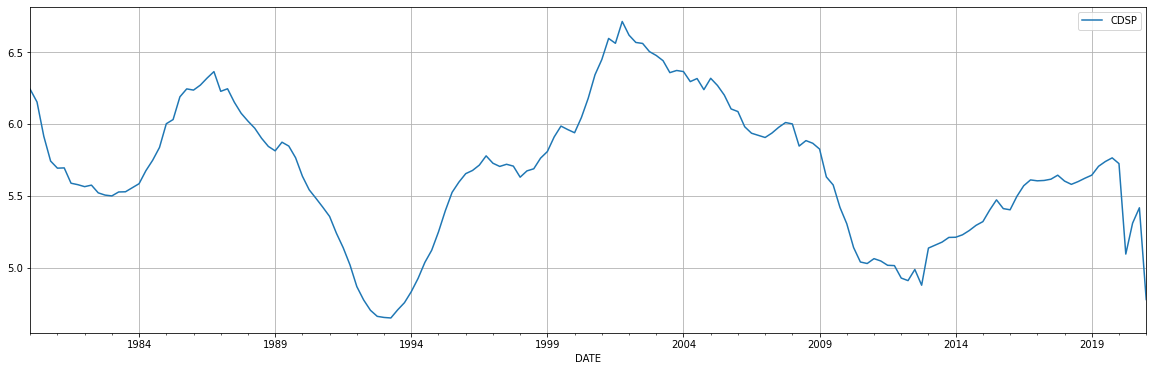

In [ ]:
cdsp.plot.line(figsize=(20,6), grid=True)

In [ ]:
# Mortgage debt
mdsp.tail()

MDSP
DATE                
2020-01-01  4.066706
2020-04-01  3.714943
2020-07-01  3.861591
2020-10-01  3.939303
2021-01-01  3.449669

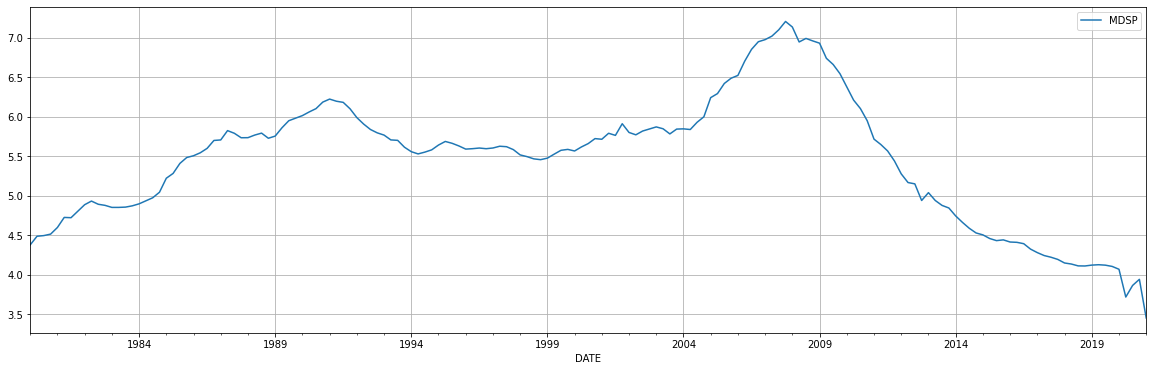

In [ ]:
mdsp.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Household Debt Service Payments as a Percent of Disposable Personal Income (TDSP)
#  tdsp = mdsp + cdsp
#  DO NOT INCLUDE THIS to the df, as we include 2 of its components
tdsp.tail()

TDSP
DATE                
2020-01-01  9.789757
2020-04-01  8.808557
2020-07-01  9.170099
2020-10-01  9.355061
2021-01-01  8.226924

In [ ]:
#  Household Financial Obligations as a Percent of Disposable Personal Income (FODSP)
#  The Financial Obligations Ratio is a broader measure than the Debt Service Ratio (TDSP).
#  It includes rent payments on tenant-occupied property, auto lease payments, homeowners' insurance, and property tax payments.
fodsp.tail()

FODSP
DATE                 
2020-01-01  15.193011
2020-04-01  13.742938
2020-07-01  14.332875
2020-10-01  14.627373
2021-01-01  12.877472

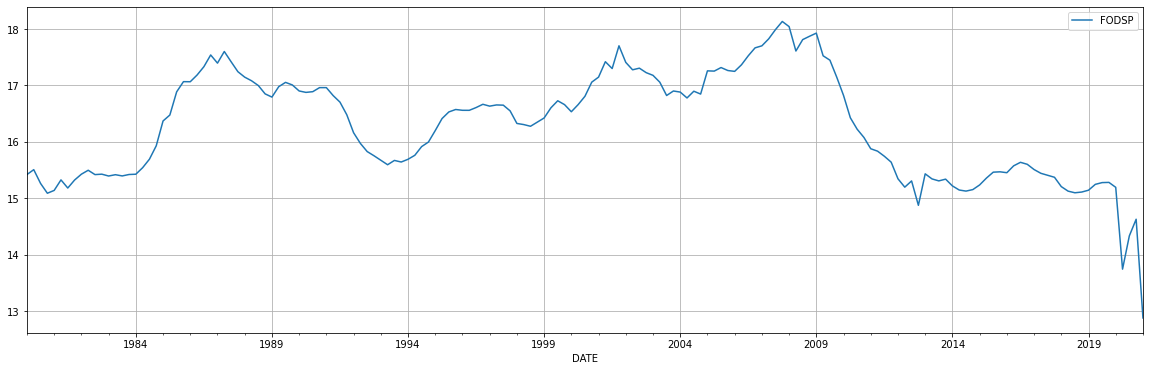

In [ ]:
fodsp.plot.line(figsize=(20,6), grid=True)

In [ ]:
# Real Disposable Personal Income [DSPIC96]
dspic96 = pdr.DataReader("DSPIC96", "fred", start=start)


dspic96['dspic96_mom'] = dspic96.DSPIC96 / dspic96.DSPIC96.shift(1)-1
dspic96['dspic96_yoy'] = dspic96.DSPIC96 / dspic96.DSPIC96.shift(12)-1

In [ ]:
dspic96.tail()

DSPIC96  dspic96_mom  dspic96_yoy
DATE                                         
2021-04-01  16102.8    -0.157781    -0.062193
2021-05-01  15598.1    -0.031342    -0.044995
2021-06-01  15517.7    -0.005154    -0.033605
2021-07-01  15630.4     0.007263    -0.032287
2021-08-01  15584.2    -0.002956     0.001948

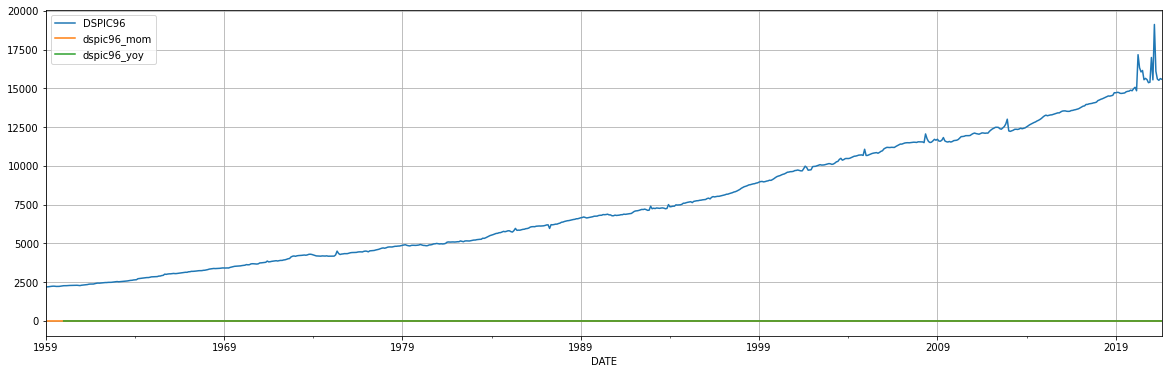

In [ ]:
dspic96.plot.line(figsize=(20,6), grid=True)

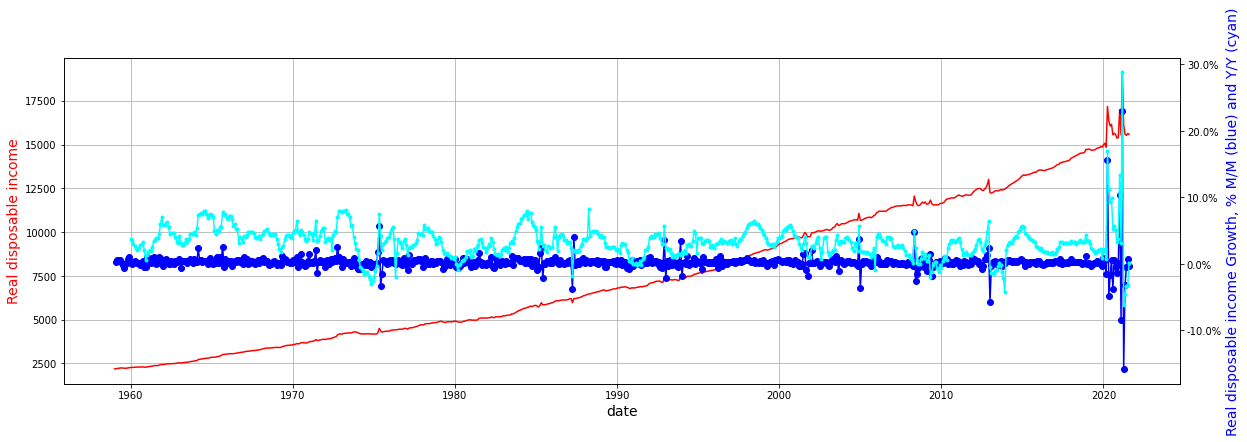

In [ ]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(dspic96.DSPIC96, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Real disposable income",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(dspic96['dspic96_mom'], color="blue",marker="o")
ax2.plot(dspic96['dspic96_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Real disposable income Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
#  Personal Consumption Expenditures (PCE) ==> make y/y?
# https://fred.stlouisfed.org/series/PCE
pce = pdr.DataReader("PCE", "fred", start=start)

pce['pce_mom'] = pce.PCE / pce.PCE.shift(1)-1
pce['pce_yoy'] = pce.PCE / pce.PCE.shift(12)-1

In [ ]:
pce.tail()

PCE   pce_mom   pce_yoy
DATE                                   
2021-04-01  15618.7  0.010337  0.299198
2021-05-01  15624.4  0.000365  0.196529
2021-06-01  15802.0  0.011367  0.137710
2021-07-01  15791.7 -0.000652  0.117664
2021-08-01  15922.2  0.008264  0.115742

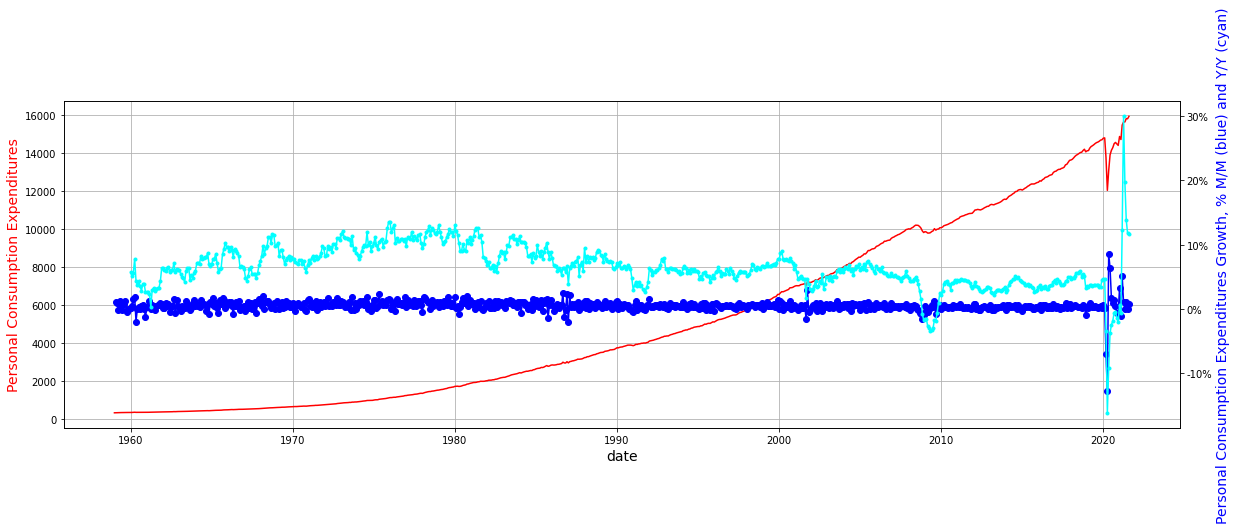

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(pce.PCE, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Personal Consumption Expenditures",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(pce['pce_mom'], color="blue",marker="o")
ax2.plot(pce['pce_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Personal Consumption Expenditures Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

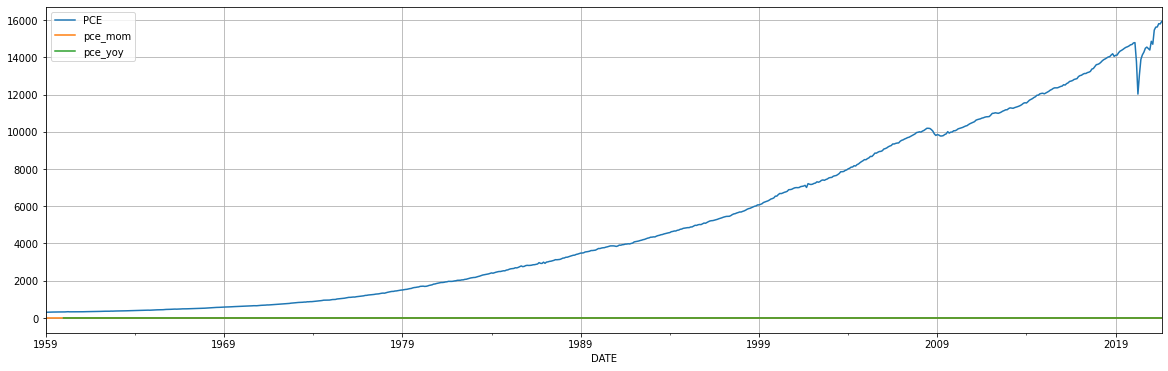

In [ ]:
pce.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Personal Consumption Expenditures: Durable Goods (PCEDG)	==> make PCEDG/PCE ratio
# https://fred.stlouisfed.org/series/PCEDG
pcedg = pdr.DataReader("PCEDG", "fred", start=start)
pcedg['pcedg_mom'] = pcedg.PCEDG / pcedg.PCEDG.shift(1)-1
pcedg['pcedg_yoy'] = pcedg.PCEDG / pcedg.PCEDG.shift(12)-1

In [ ]:
pcedg.tail()

PCEDG  pcedg_mom  pcedg_yoy
DATE                                    
2021-04-01  2150.3   0.012382   0.798812
2021-05-01  2065.7  -0.039343   0.347928
2021-06-01  2060.5  -0.002517   0.228755
2021-07-01  1975.6  -0.041204   0.141372
2021-08-01  1968.0  -0.003847   0.121751

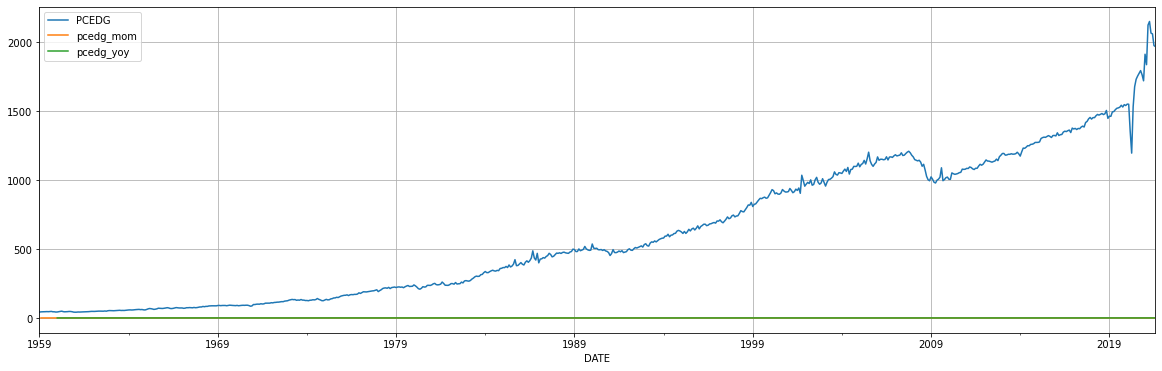

In [ ]:
pcedg.plot.line(figsize=(20,6), grid=True)

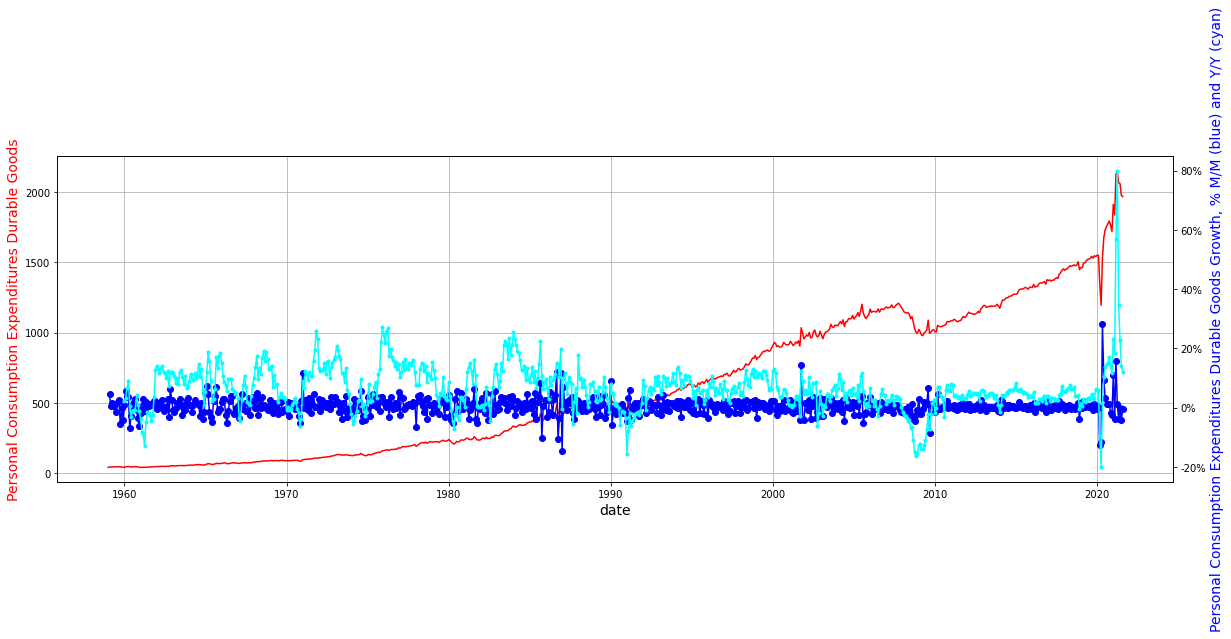

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(pcedg.PCEDG, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Personal Consumption Expenditures Durable Goods",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(pcedg['pcedg_mom'], color="blue",marker="o")
ax2.plot(pcedg['pcedg_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Personal Consumption Expenditures Durable Goods Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
# Personal saving as a percentage of disposable personal income (DPI),
# frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI.
# https://fred.stlouisfed.org/series/PSAVERT
psavert = pdr.DataReader("PSAVERT", "fred", start=start)

In [ ]:
psavert.tail()

PSAVERT
DATE               
2021-04-01     12.4
2021-05-01     10.0
2021-06-01      9.0
2021-07-01     10.1
2021-08-01      9.4

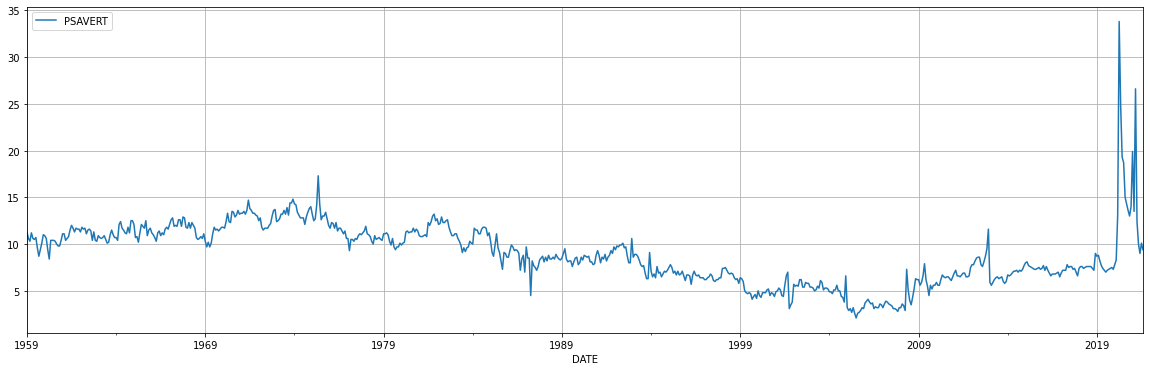

In [ ]:
psavert.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Disposable Personal Income (DSPI)	==> y/y?
# https://fred.stlouisfed.org/series/DSPI
dspi = pdr.DataReader("DSPI", "fred", start=start)

dspi['dspi_mom'] = dspi.DSPI / dspi.DSPI.shift(1)-1
dspi['dspi_yoy'] = dspi.DSPI / dspi.DSPI.shift(12)-1

In [ ]:
dspi.tail()

DSPI  dspi_mom  dspi_yoy
DATE                                   
2021-04-01  18379.5 -0.152975 -0.028537
2021-05-01  17898.5 -0.026170 -0.006963
2021-06-01  17903.0  0.000251  0.005470
2021-07-01  18105.0  0.011283  0.008040
2021-08-01  18123.9  0.001044  0.044629

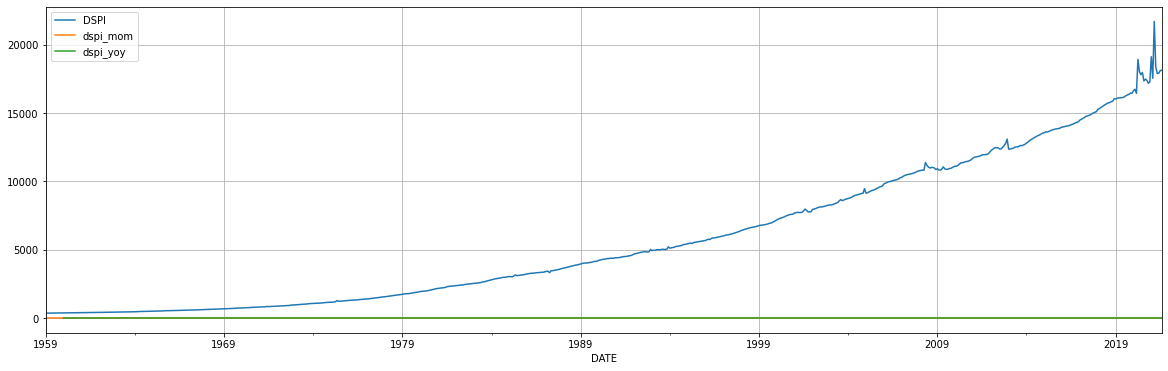

In [ ]:
dspi.plot.line(figsize=(20,6), grid=True)

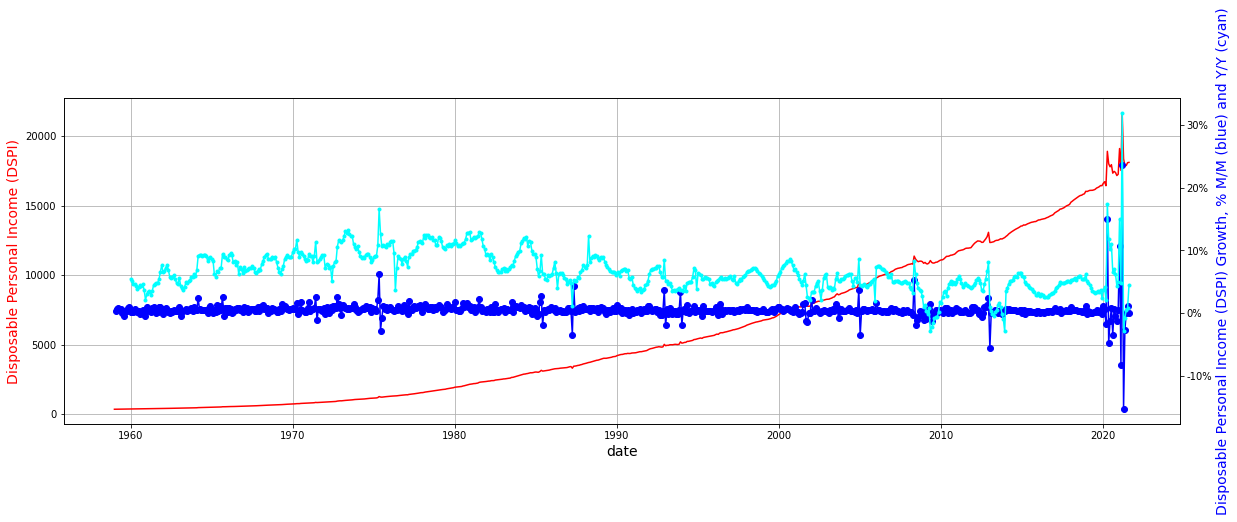

In [ ]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(dspi.DSPI, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Disposable Personal Income (DSPI)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(dspi['dspi_mom'], color="blue",marker="o")
ax2.plot(dspi['dspi_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Disposable Personal Income (DSPI) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
#  Advance Retail Sales: Retail Trade (RSXFS)	 m$ --> make y/y ?
# https://fred.stlouisfed.org/series/RSXFS
rsxfs = pdr.DataReader("RSXFS", "fred", start=start)
rsxfs['rsxfs_mom'] = rsxfs.RSXFS / rsxfs.RSXFS.shift(1)-1
rsxfs['rsxfs_yoy'] = rsxfs.RSXFS / rsxfs.RSXFS.shift(12)-1

In [ ]:
rsxfs.tail()

RSXFS  rsxfs_mom  rsxfs_yoy
DATE                                    
2021-04-01  562269   0.004283   0.480076
2021-05-01  550781  -0.020432   0.238737
2021-06-01  554388   0.006549   0.165359
2021-07-01  542351  -0.021712   0.126839
2021-08-01  546692   0.008004   0.131488

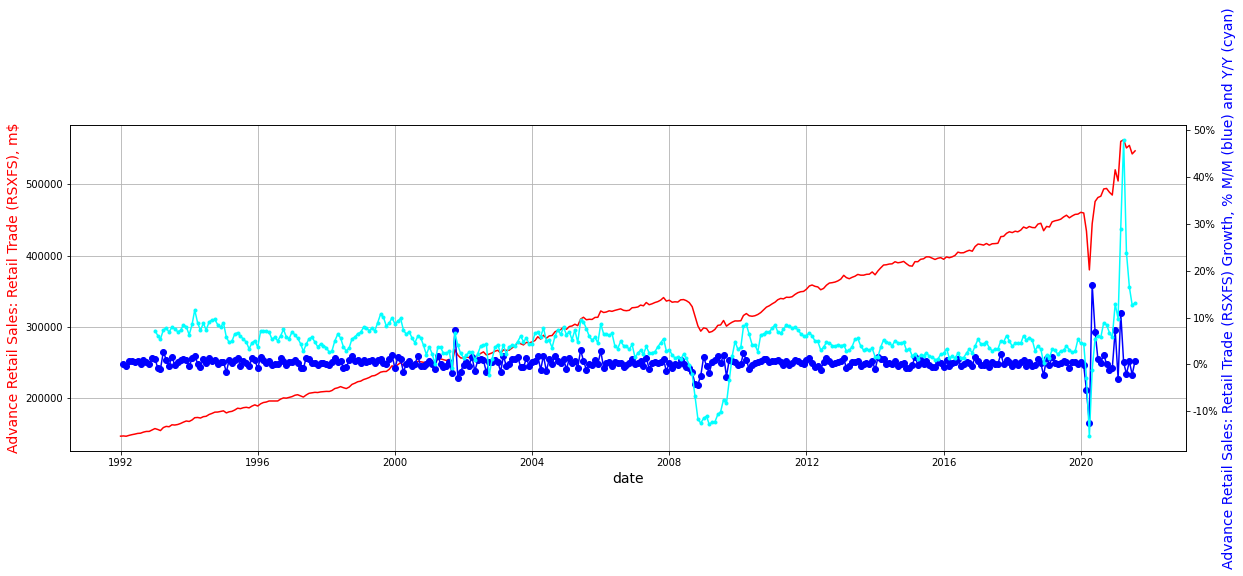

In [ ]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(rsxfs.RSXFS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Advance Retail Sales: Retail Trade (RSXFS), m$",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(rsxfs['rsxfs_mom'], color="blue",marker="o")
ax2.plot(rsxfs['rsxfs_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Advance Retail Sales: Retail Trade (RSXFS) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

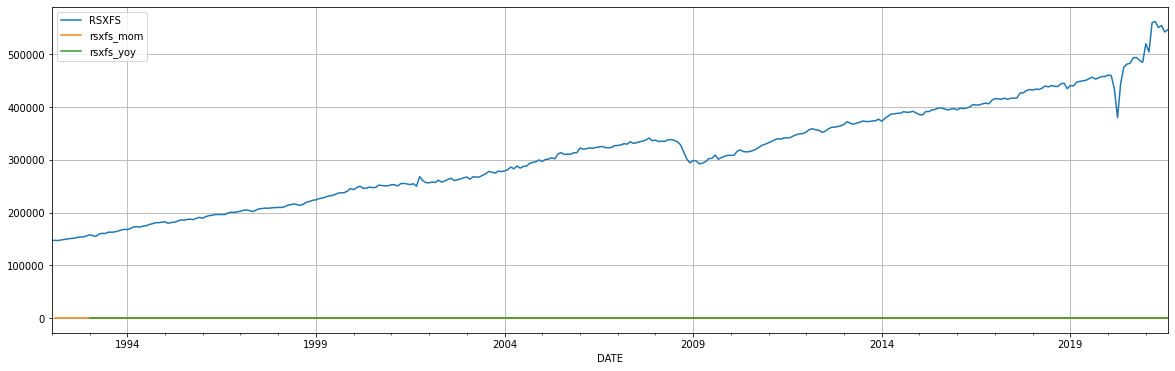

In [ ]:
rsxfs.plot.line(figsize=(20,6), grid=True)

## 1.7 Other economic indicators

In [ ]:
#  Industrial Production: Total Index (INDPRO), %	 ==> no transform
 # https://fred.stlouisfed.org/series/INDPRO
indpro = pdr.DataReader("INDPRO", "fred", start=start)
indpro.tail()

INDPRO
DATE                
2021-04-01   99.2301
2021-05-01   99.8504
2021-06-01  100.3398
2021-07-01  101.1874
2021-08-01  101.5949

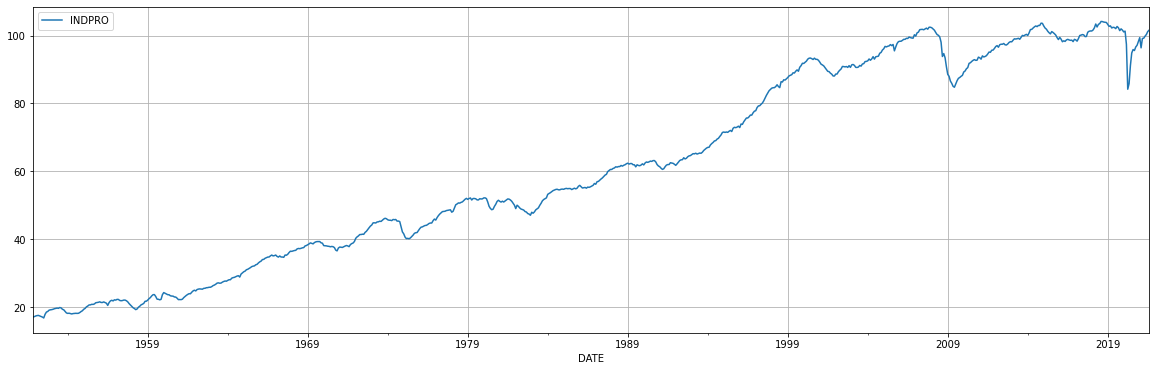

In [ ]:
indpro.plot.line(figsize=(20,6), grid=True)

In [ ]:
# Capacity Utilization: Total Index (TCU)	, % ==> no transform
  #Definition:  We can also think of capacity utilization as how much capacity
  # is being used from the total available capacity to produce demanded finished products.
# https://fred.stlouisfed.org/series/TCU
tcu = pdr.DataReader("TCU", "fred", start=start)
tcu.tail()

TCU
DATE               
2021-04-01  74.7846
2021-05-01  75.2273
2021-06-01  75.5661
2021-07-01  76.1699
2021-08-01  76.4379

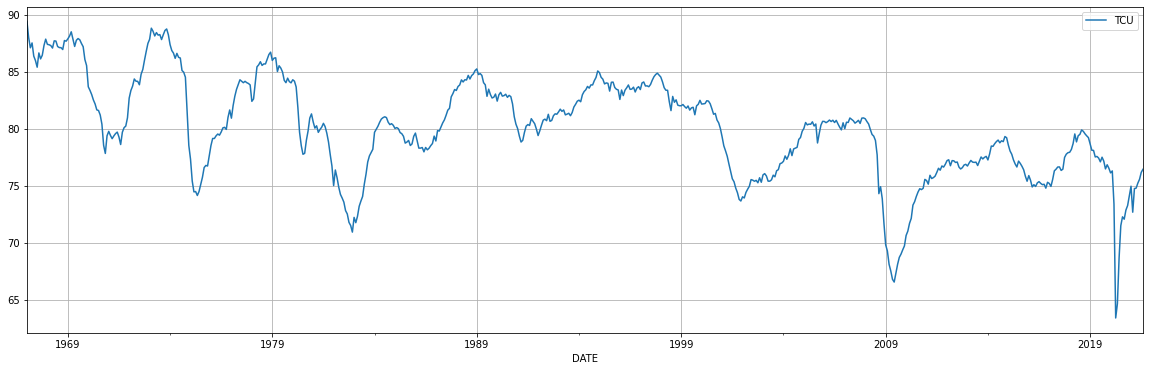

In [ ]:
tcu.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  New Privately-Owned Housing Units Started: Total Units (HOUST) => y/y?	  (Units:  Thousands of Units, Seasonally Adjusted Annual Rate)
# https://fred.stlouisfed.org/series/HOUST
houst = pdr.DataReader("HOUST", "fred", start=start)
houst['houst_mom'] = houst.HOUST / houst.HOUST.shift(1)-1
houst['houst_yoy'] = houst.HOUST / houst.HOUST.shift(12)-1
houst.tail()

HOUST  houst_mom  houst_yoy
DATE                                    
2021-04-01  1514.0  -0.122319   0.614072
2021-05-01  1594.0   0.052840   0.523901
2021-06-01  1657.0   0.039523   0.301650
2021-07-01  1554.0  -0.062161   0.038076
2021-08-01  1615.0   0.039254   0.173692

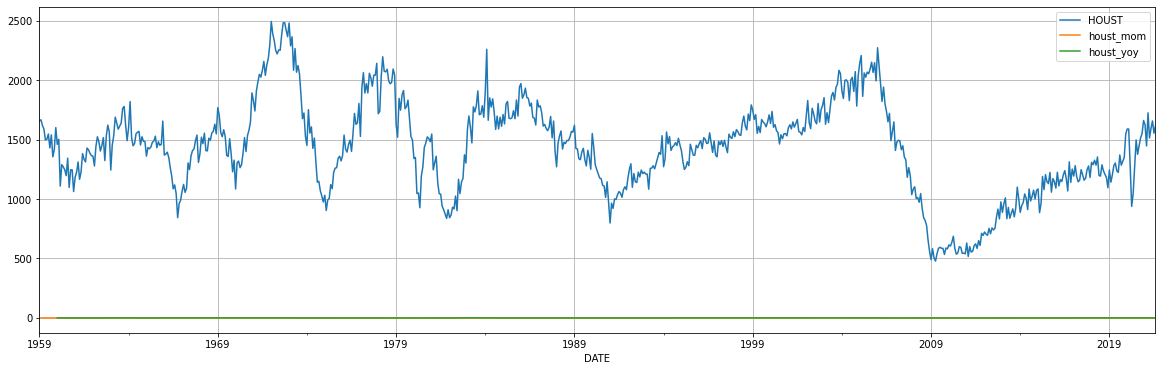

In [ ]:
houst.plot.line(figsize=(20,6), grid=True)

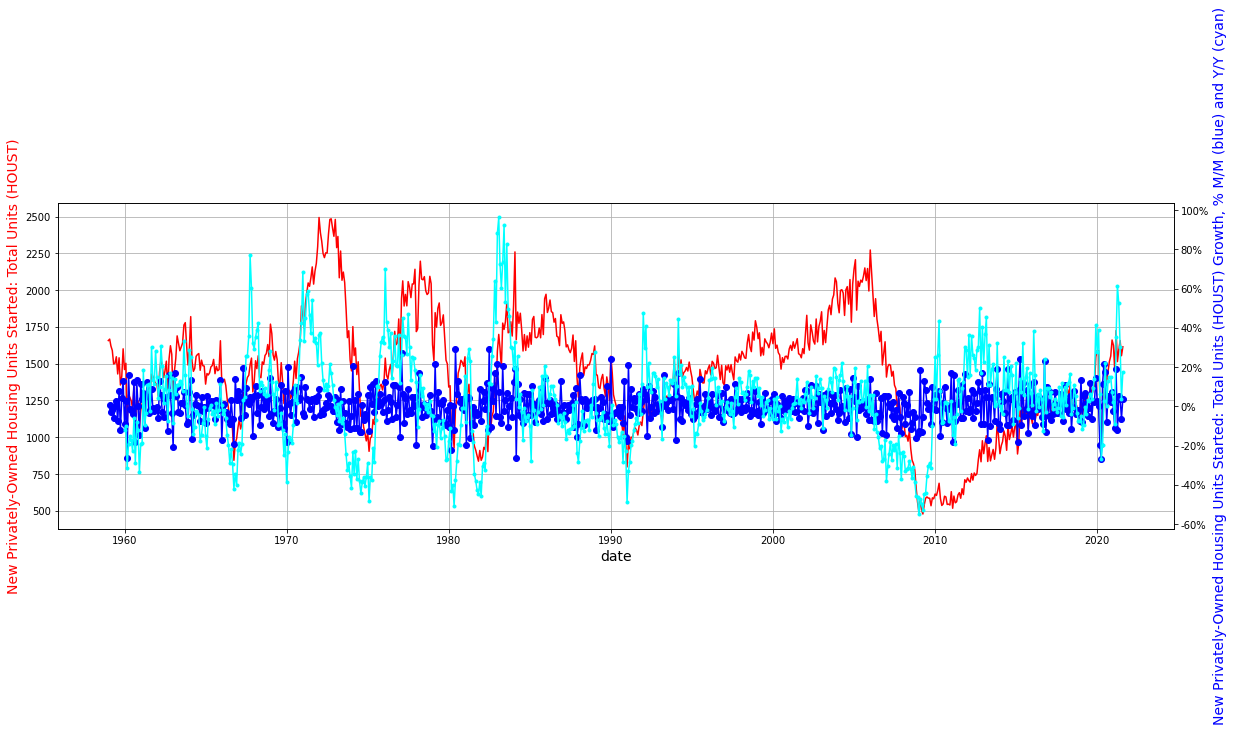

In [ ]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(houst.HOUST, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("New Privately-Owned Housing Units Started: Total Units (HOUST)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(houst['houst_mom'], color="blue",marker="o")
ax2.plot(houst['houst_yoy'], color="cyan",marker=".")
ax2.set_ylabel("New Privately-Owned Housing Units Started: Total Units (HOUST) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [ ]:
#  Gross Private Domestic Investment (GPDI)	, Quarterly -> QoQ or YoY?
# https://fred.stlouisfed.org/series/GPDI
gpdi = pdr.DataReader("GPDI", "fred", start=start)

gpdi['gpdi_qoq'] = gpdi.GPDI / gpdi.GPDI.shift(1)-1
gpdi['gpdi_yoy'] = gpdi.GPDI / gpdi.GPDI.shift(4)-1
gpdi.tail()

GPDI  gpdi_qoq  gpdi_yoy
DATE                                    
2020-04-01  3166.987 -0.156002 -0.175900
2020-07-01  3708.799  0.171081 -0.038721
2020-10-01  3923.164  0.057799  0.031884
2021-01-01  3927.984  0.001229  0.046803
2021-04-01  3925.069 -0.000742  0.239370

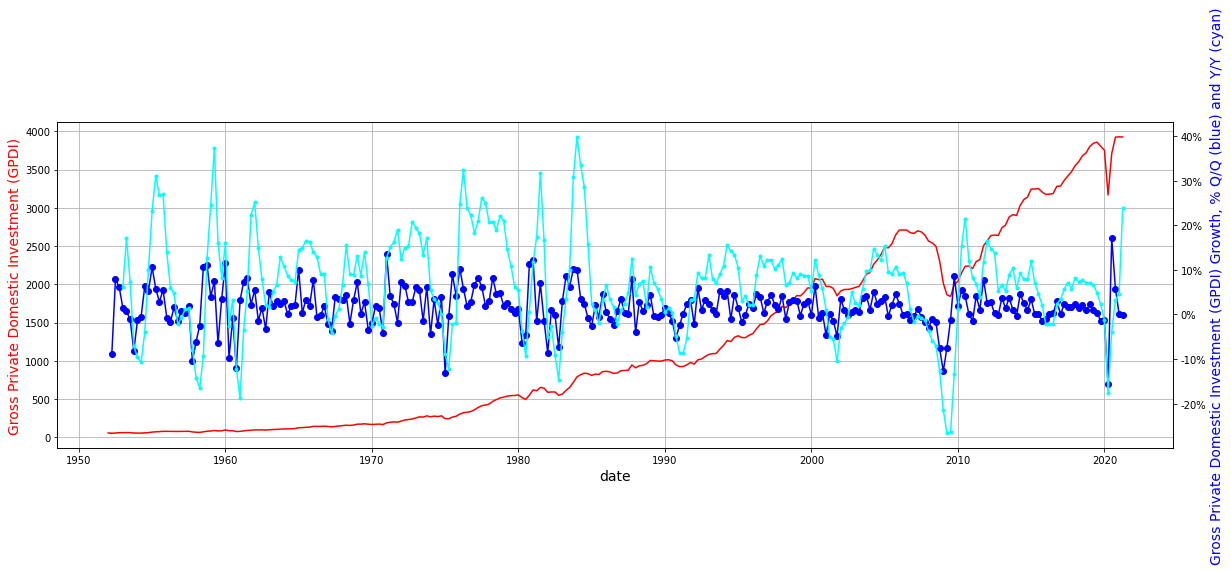

In [ ]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gpdi.GPDI, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Gross Private Domestic Investment (GPDI)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gpdi['gpdi_qoq'], color="blue",marker="o")
ax2.plot(gpdi['gpdi_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Gross Private Domestic Investment (GPDI) Growth, % Q/Q (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

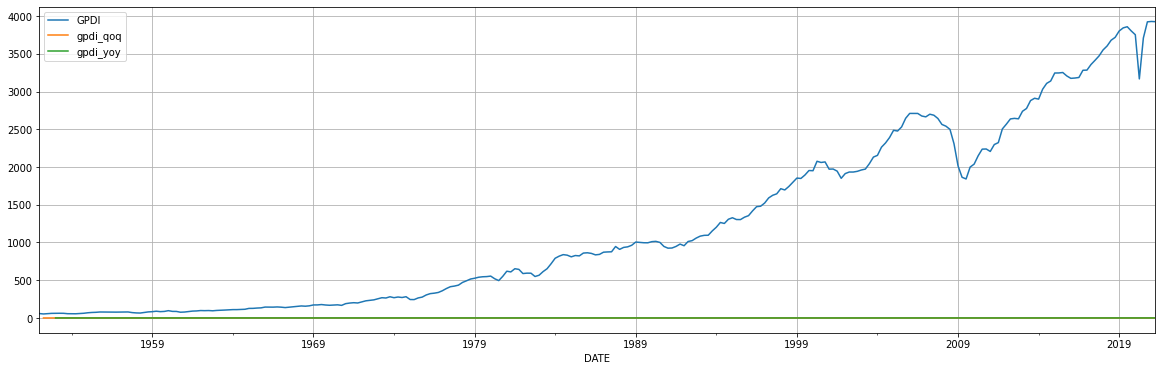

In [ ]:
gpdi.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Corporate Profits After Tax (without IVA and CCAdj) (CP)	, $b --> y/y ?
# https://fred.stlouisfed.org/series/CP
cp = pdr.DataReader("CP", "fred", start=start)

cp['cp_qoq'] = cp.CP / cp.CP.shift(1)-1
cp['cp_yoy'] = cp.CP / cp.CP.shift(4)-1
cp.tail()

CP    cp_qoq    cp_yoy
DATE                                    
2020-04-01  1577.736 -0.095015 -0.205371
2020-07-01  2148.157  0.361544  0.116837
2020-10-01  2164.457  0.007588  0.102301
2021-01-01  2367.593  0.093851  0.358045
2021-04-01  2690.388  0.136339  0.705221

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


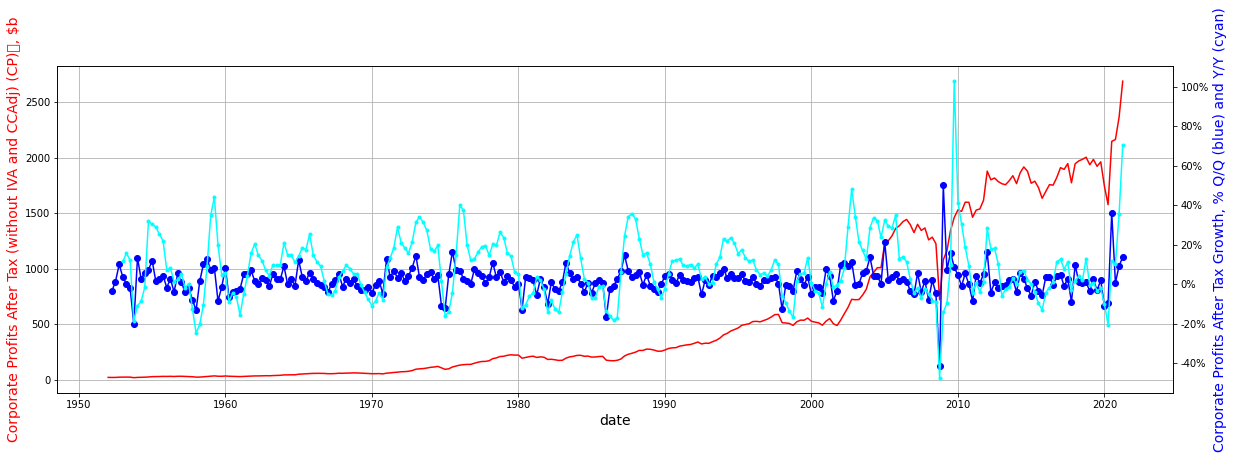

In [ ]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cp.CP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Corporate Profits After Tax (without IVA and CCAdj) (CP)	, $b",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cp['cp_qoq'], color="blue",marker="o")
ax2.plot(cp['cp_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Corporate Profits After Tax Growth, % Q/Q (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

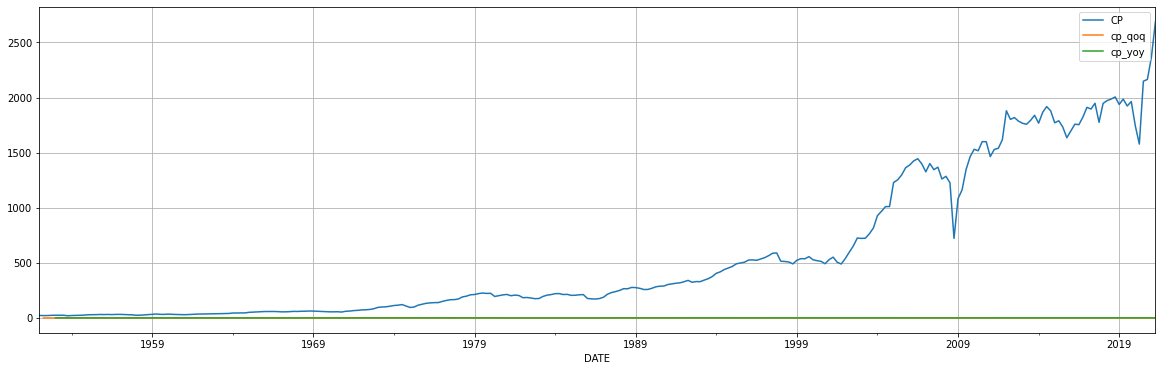

In [ ]:
cp.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  St. Louis Fed Financial Stress Index (STLFSI2) ==> no transformation (normal==0 values) ==> weekly
 # The STLFSI2 measures the degree of financial stress in the markets and is constructed from 18 weekly data series,
 # all of which are weekly averages of daily data series: seven interest rates, six yield spreads, and five other indicators.
 #  Each of these variables captures some aspect of financial stress. Accordingly, as the level of financial stress in the economy changes, the data series are likely to move together.

 # How to Interpret the Index:
 # The average value of the index, which begins in late 1993, is designed to be zero.
 # Thus, zero is viewed as representing normal financial market conditions.
 # Values below zero suggest below-average financial market stress,
 # while values above zero suggest above-average financial market stress.


# https://fred.stlouisfed.org/series/STLFSI2

stlfsi2 = pdr.DataReader("STLFSI2", "fred", start=start)
stlfsi2.tail()

STLFSI2
DATE               
2021-08-27  -1.0003
2021-09-03  -0.9943
2021-09-10  -0.9699
2021-09-17  -0.9380
2021-09-24  -0.7951

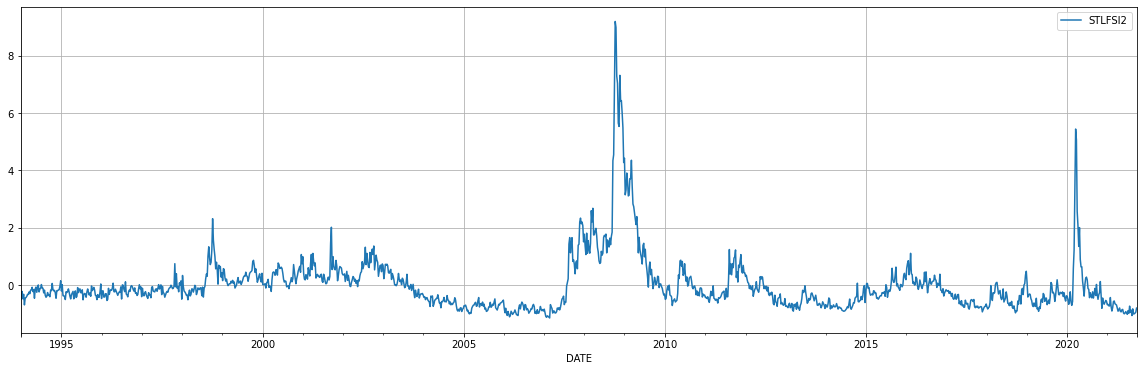

In [ ]:
stlfsi2.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
wti_oil = pdr.DataReader("DCOILWTICO", "fred", start=start)
wti_oil.tail()

DCOILWTICO
DATE                  
2021-09-28       75.44
2021-09-29       75.06
2021-09-30       75.22
2021-10-01       76.01
2021-10-04       77.68

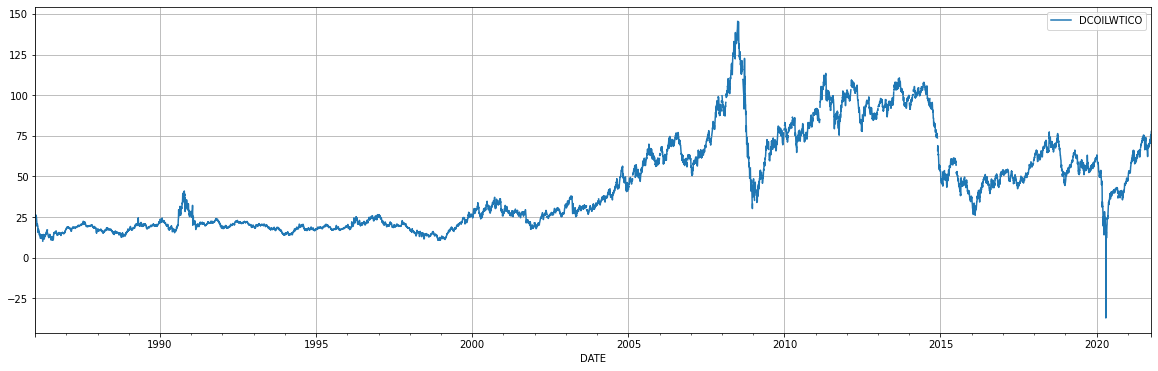

In [ ]:
wti_oil.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Trade Weighted U.S. Dollar Index: Advanced Foreign Economies, Goods and Services (DTWEXAFEGS)
# https://fred.stlouisfed.org/series/DTWEXAFEGS
dtwexafegs =  pdr.DataReader("DTWEXAFEGS", "fred", start=start)
dtwexafegs.tail()

DTWEXAFEGS
DATE                  
2021-09-27    105.6695
2021-09-28    106.0857
2021-09-29    106.6740
2021-09-30    106.5475
2021-10-01    106.2367

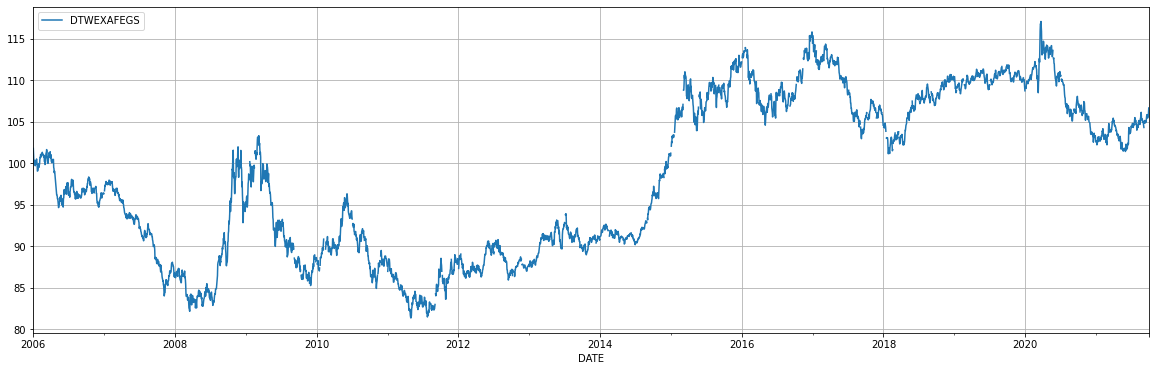

In [ ]:
dtwexafegs.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Trade Weighted U.S. Dollar Index: Broad, Goods and Services (DTWEXBGS)
# https://fred.stlouisfed.org/series/DTWEXBGS
dtwexbgs = pdr.DataReader("DTWEXBGS", "fred", start=start)
dtwexbgs.tail()

DTWEXBGS
DATE                
2021-09-27  114.0633
2021-09-28  114.5820
2021-09-29  115.0563
2021-09-30  114.9900
2021-10-01  114.7126

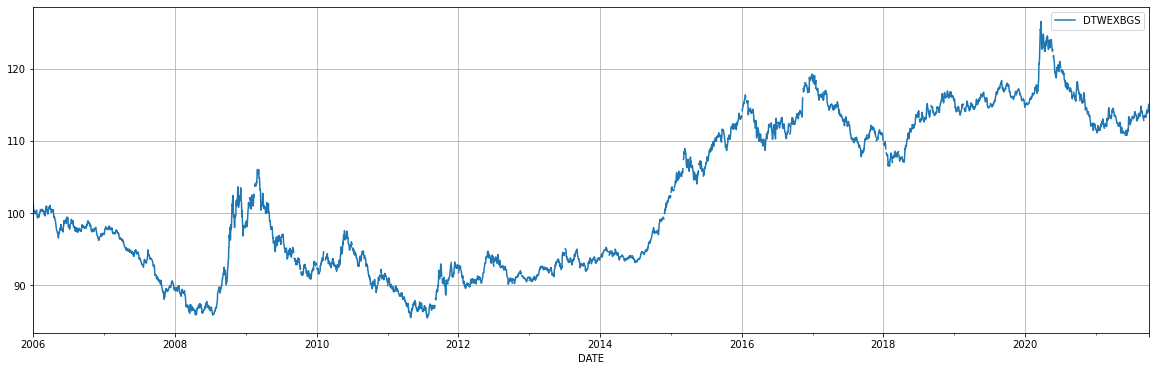

In [ ]:
dtwexbgs.plot.line(figsize=(20,6), grid=True)

## 1.8) DEBT

*GFDEBTN, GFDEGDQ188S*

In [ ]:
#  Federal Debt: Total Public Debt (GFDEBTN) --> y/y?
# https://fred.stlouisfed.org/series/GFDEBTN
gfdebtn = pdr.DataReader("GFDEBTN", "fred", start=start)
gfdebtn.tail()

GFDEBTN
DATE                  
2020-04-01  26477241.0
2020-07-01  26945391.0
2020-10-01  27747798.0
2021-01-01  28132570.0
2021-04-01  28529436.0

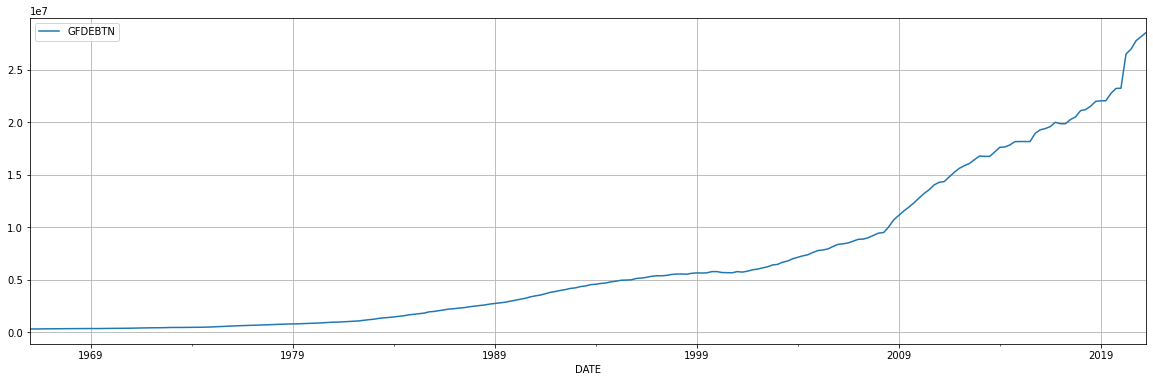

In [ ]:
gfdebtn.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S)
# https://fred.stlouisfed.org/series/GFDEGDQ188S

gfdegdq188s = pdr.DataReader("GFDEGDQ188S", "fred", start=start)
gfdegdq188s.tail()

GFDEGDQ188S
DATE                   
2020-04-01    135.93796
2020-07-01    127.47024
2020-10-01    129.19415
2021-01-01    127.65351
2021-04-01    125.45397

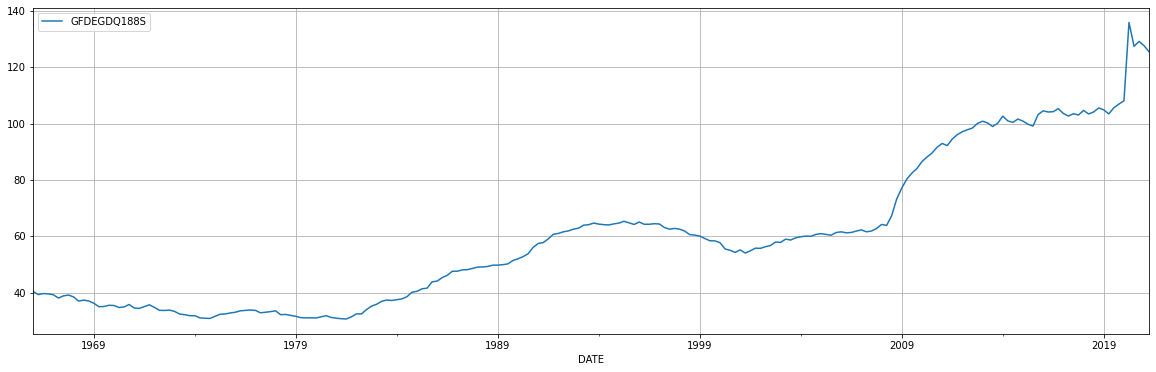

In [ ]:
gfdegdq188s.plot.line(figsize=(20,6), grid=True)

## 1.9 OTHER FROM IVAN

In [ ]:
#  U.S. / Euro Foreign Exchange Rate (DEXUSEU)
# https://fred.stlouisfed.org/series/DEXUSEU
usdeur_ex = pdr.DataReader("DEXUSEU", "fred", start=start)
usdeur_ex.tail()

DEXUSEU
DATE               
2021-09-27   1.1702
2021-09-28   1.1681
2021-09-29   1.1612
2021-09-30   1.1577
2021-10-01   1.1598

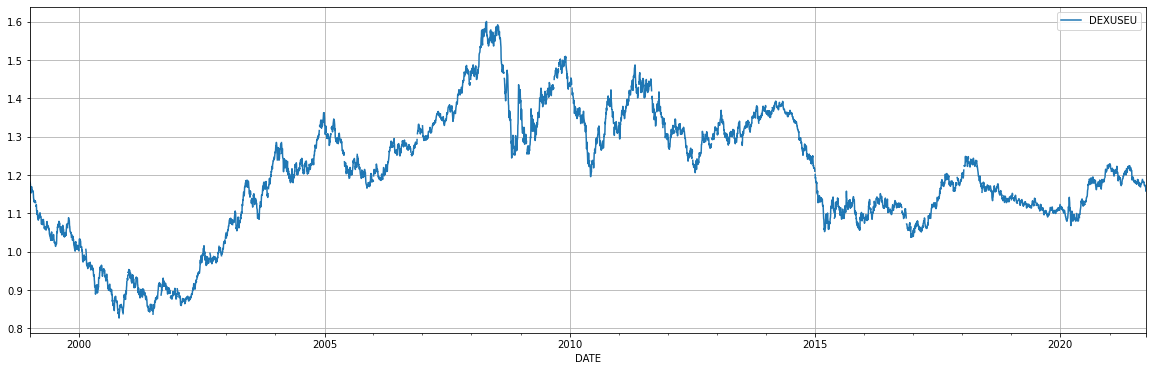

In [ ]:
usdeur_ex.plot.line(figsize=(20,6), grid=True)

In [ ]:
# CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gvzcls = pdr.DataReader("GVZCLS", "fred", start=start)
gvzcls.tail(5)

GVZCLS
DATE              
2021-09-29   17.39
2021-09-30   17.16
2021-10-01   16.32
2021-10-04   16.77
2021-10-05   16.56

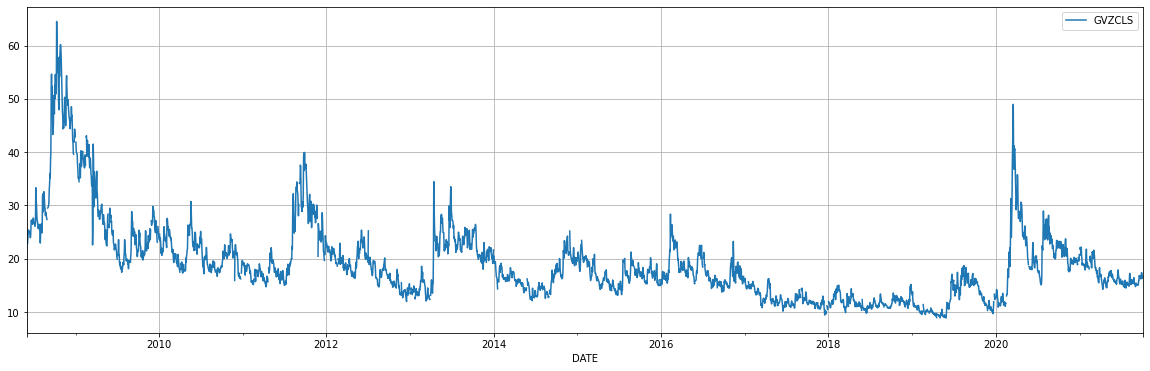

In [ ]:
gvzcls.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  CBOE Volatility Index: VIX (VIXCLS)
# https://fred.stlouisfed.org/series/VIXCLS

vixcls = pdr.DataReader("VIXCLS", "fred", start=start)
vixcls.tail()

VIXCLS
DATE              
2021-09-29   22.56
2021-09-30   23.14
2021-10-01   21.15
2021-10-04   22.96
2021-10-05   21.30

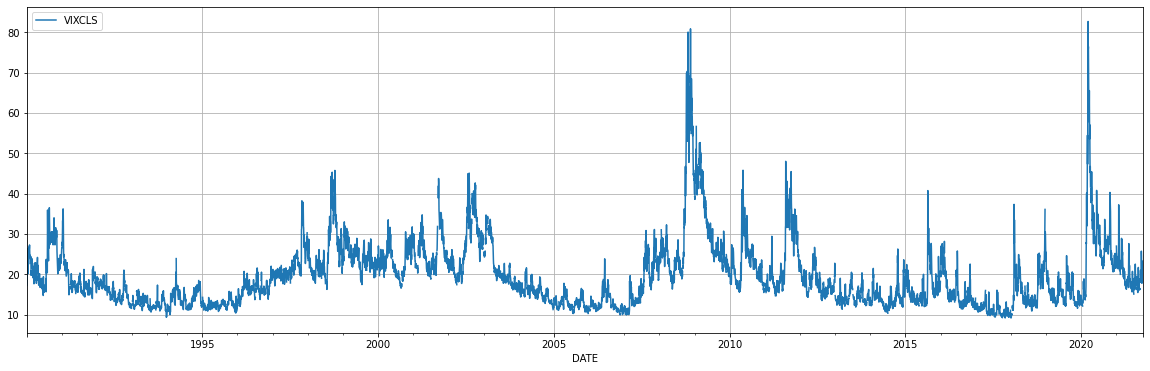

In [ ]:
vixcls.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  Corporate Profits after tax with IVA and CCAdj: Net Dividends (DIVIDEND)
dividend = pdr.DataReader("DIVIDEND", "fred", start=start)
dividend.tail()

DIVIDEND
DATE                
2020-04-01  1395.669
2020-07-01  1368.618
2020-10-01  1397.506
2021-01-01  1359.670
2021-04-01  1411.030

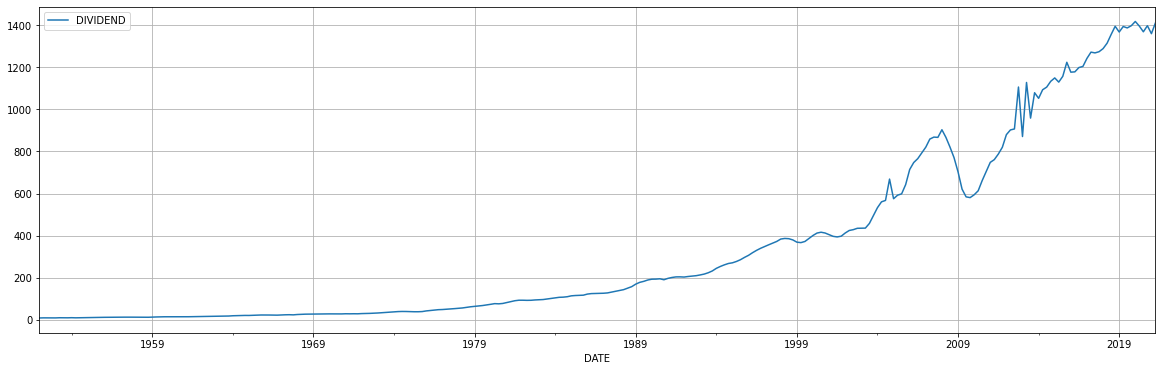

In [ ]:
dividend.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)
# https://fred.stlouisfed.org/series/MORTGAGE30US
mortgage30 = pdr.DataReader("MORTGAGE30US", "fred", start=start)
mortgage30.tail()

MORTGAGE30US
DATE                    
2021-09-02          2.87
2021-09-09          2.88
2021-09-16          2.86
2021-09-23          2.88
2021-09-30          3.01

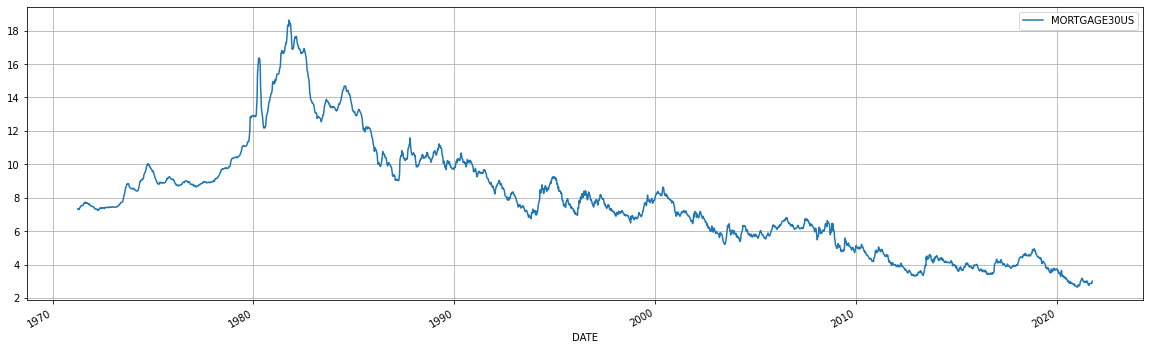

In [ ]:
mortgage30.plot.line(figsize=(20,6), grid=True)

In [ ]:
#  S&P/Case-Shiller 20-City Composite Home Price Index (SPCS20RSA)
# https://fred.stlouisfed.org/series/SPCS20RSA
spcs20rsa = pdr.DataReader("SPCS20RSA", "fred", start=start)
spcs20rsa.tail()

SPCS20RSA
DATE                  
2021-03-01  252.873625
2021-04-01  257.342243
2021-05-01  262.051540
2021-06-01  266.730033
2021-07-01  270.857125

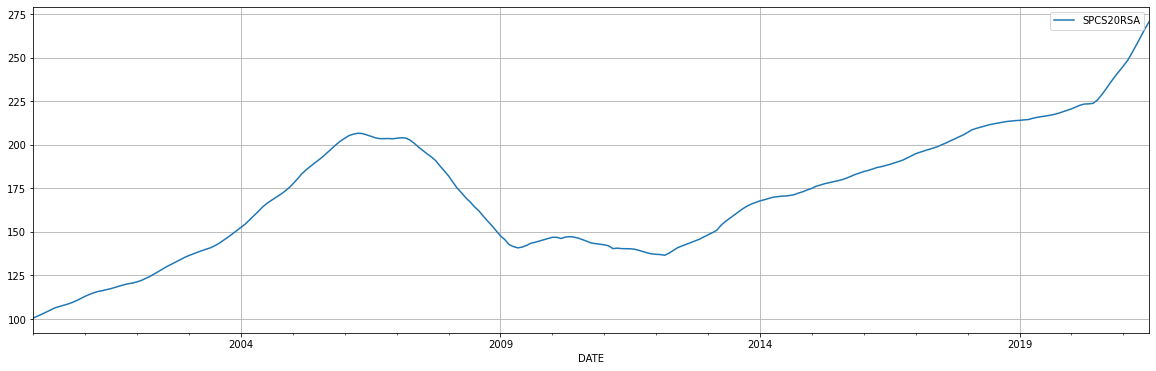

In [ ]:
spcs20rsa.plot.line(figsize=(20,6), grid=True)

In [ ]:
# https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
bitcoin_price_daily = quandl.get("BCHAIN/MKPRU",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")
bitcoin_price_daily.tail()

Value
Date                
2021-10-03  47727.10
2021-10-04  48205.72
2021-10-05  49143.95
2021-10-06  51505.83
2021-10-07  55343.76

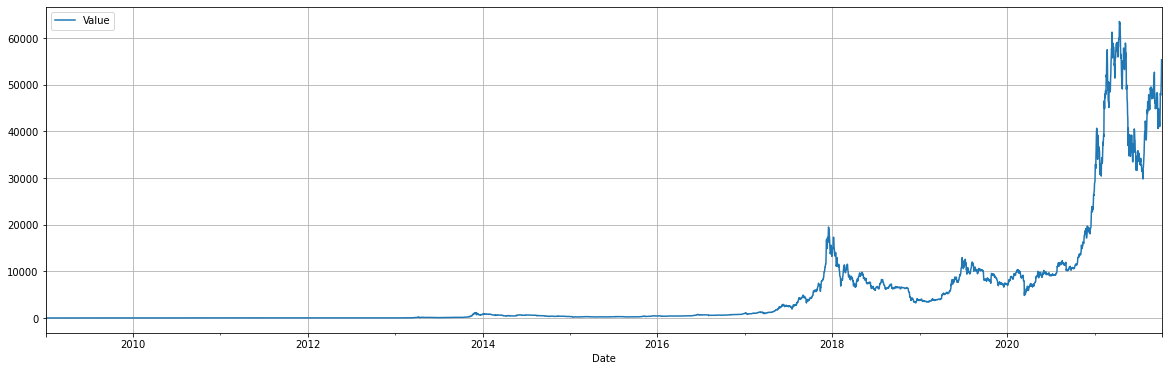

In [ ]:
bitcoin_price_daily.plot.line(figsize=(20,6), grid=True)

In [ ]:
from datetime import datetime
from datetime import date

# DXY Index  :: Dollar vs. other currencies basket index
# https://www.investopedia.com/terms/u/usdx.asp
# https://finance.yahoo.com/quote/DX-Y.NYB/history?p=DX-Y.NYB

# Query example:
# https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2=1615680000&interval=1d&events=history&includeAdjustedClose=true
# dxy = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2=1615680000&interval=1d&events=history&includeAdjustedClose=true")

timestamp = 31795200
print('first timestamp', datetime.fromtimestamp(timestamp))

# LAST DAY: clean the timestamp for the beginning of the day
timestamp_now = datetime.timestamp(datetime.today().replace(hour=0, minute=0, second=0, microsecond=0))

last_day_str = str(round(timestamp_now))
print(last_day_str)

http_query_str = f'https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2={last_day_str}&interval=1d&events=history&includeAdjustedClose=true'

dxy = pd.read_csv(http_query_str)
dxy['Date'] = pd.to_datetime(dxy['Date'])
dxy.set_index("Date",inplace=True)
dxy.tail()

first timestamp 1971-01-04 00:00:00
1633564800


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2021-10-01  94.309998  94.389999  93.989998  94.040001  94.040001     0.0
2021-10-03        NaN        NaN        NaN        NaN        NaN     NaN
2021-10-04  94.070000  94.099998  93.680000  93.809998  93.809998     0.0
2021-10-05  93.830002  94.070000  93.809998  93.980003  93.980003     0.0
2021-10-06  93.989998  94.449997  93.980003  94.269997  94.269997     0.0

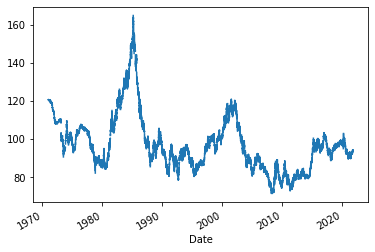

In [ ]:
# DXY index line

dxy.Close.plot.line()

In [ ]:
# 1. Treasury rates: https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
           # (Ivan) Earliest date for the time-series is 1990-01-01
us_treasury_yield_curve = quandl.get("USTREASURY/YIELD",start_date="1990-01-01", end_date = date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")

us_treasury_yield_curve.tail()

1 MO  2 MO  3 MO  6 MO  1 YR  ...  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                      ...                                 
2021-09-30  0.07  0.05  0.04  0.05  0.09  ...  0.98  1.32   1.52   2.02   2.08
2021-10-01  0.08  0.04  0.04  0.05  0.09  ...  0.93  1.26   1.48   1.99   2.04
2021-10-04  0.09  0.04  0.04  0.06  0.09  ...  0.95  1.27   1.49   1.99   2.05
2021-10-05  0.10  0.04  0.04  0.06  0.09  ...  0.98  1.32   1.54   2.04   2.10
2021-10-06  0.06  0.04  0.04  0.06  0.10  ...  0.99  1.32   1.53   2.02   2.08

[5 rows x 12 columns]

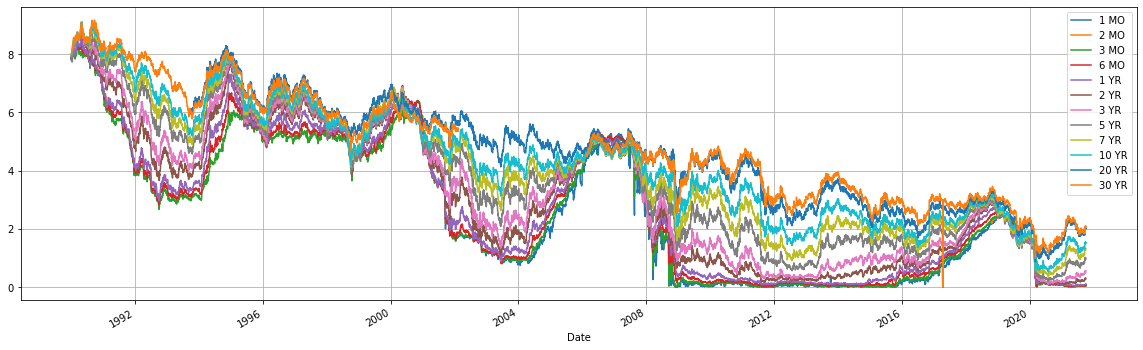

In [ ]:
us_treasury_yield_curve.plot.line(figsize=(20,6), grid=True)

In [ ]:
# 2. Treasury rate corr. on inflation (TIPS): https://www.quandl.com/data/USTREASURY/REALYIELD-Treasury-Real-Yield-Curve-Rates
us_treasury_real_yield_curve = quandl.get("USTREASURY/REALYIELD", start_date="1990-01-01", end_date = date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")
us_treasury_real_yield_curve.tail()

5 YR  7 YR  10 YR  20 YR  30 YR
Date                                       
2021-09-30 -1.53 -1.17  -0.85  -0.39  -0.19
2021-10-01 -1.58 -1.23  -0.90  -0.44  -0.23
2021-10-04 -1.58 -1.22  -0.89  -0.44  -0.23
2021-10-05 -1.61 -1.25  -0.91  -0.44  -0.23
2021-10-06 -1.58 -1.23  -0.90  -0.44  -0.24

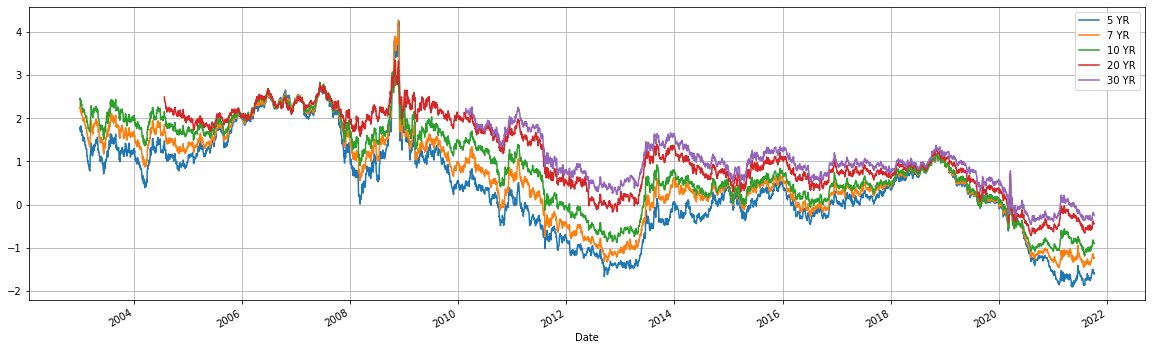

In [ ]:
us_treasury_real_yield_curve.plot.line(figsize=(20,6), grid=True)

In [ ]:
# 9. Shiller P/E ratio by Month
shiller_pe_ratio_monthly = quandl.get("MULTPL/SHILLER_PE_RATIO_MONTH",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")
shiller_pe_ratio_monthly.tail()

Value
Date             
2021-08-01  38.44
2021-08-31  39.06
2021-09-01  39.07
2021-09-30  37.20
2021-10-01  37.63

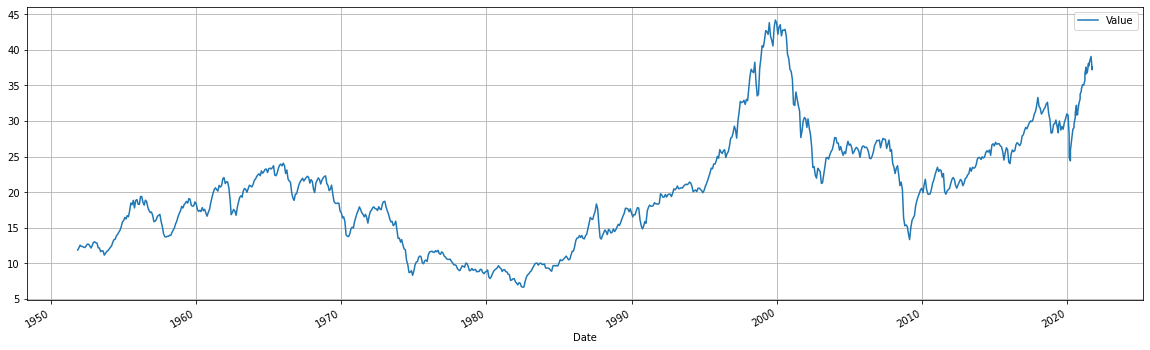

In [ ]:
shiller_pe_ratio_monthly.plot.line(figsize=(20,6), grid=True)

In [ ]:
# 5. Gold price (London Fixing Gold Price): https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
london_fixing_gold_price = quandl.get("LBMA/GOLD",start_date="1980-01-01", end_date=date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")


In [ ]:
london_fixing_gold_price.head()

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
1980-01-02    559.00     559.5   251.123   250.841        NaN        NaN
1980-01-03    632.00     634.0   281.577   282.468        NaN        NaN
1980-01-04    596.00     588.0   266.285   262.770        NaN        NaN
1980-01-07    634.00     633.5   281.653   280.062        NaN        NaN
1980-01-08    615.75     610.0   273.060   270.270        NaN        NaN

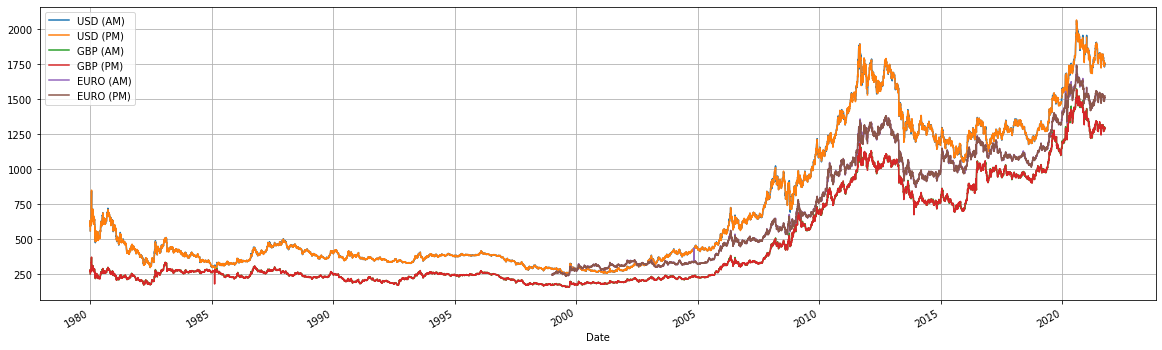

In [ ]:
london_fixing_gold_price.plot.line(figsize=(20,6), grid=True)